[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: all_poems.txt
  input_format: 
  model_prefix: urdu_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  

Epoch 1/20, Train Loss: 4.1172, Val Loss: 0.5736
Epoch 2/20, Train Loss: 0.4593, Val Loss: 0.1614
Epoch 3/20, Train Loss: 0.2275, Val Loss: 0.1370
Epoch 4/20, Train Loss: 0.1878, Val Loss: 0.1315
Epoch 5/20, Train Loss: 0.1734, Val Loss: 0.1315
Epoch 6/20, Train Loss: 0.1654, Val Loss: 0.1302
Epoch 7/20, Train Loss: 0.1598, Val Loss: 0.1288
Epoch 8/20, Train Loss: 0.1552, Val Loss: 0.1275
Epoch 9/20, Train Loss: 0.1522, Val Loss: 0.1267
Epoch 10/20, Train Loss: 0.1494, Val Loss: 0.1257
Epoch 11/20, Train Loss: 0.1474, Val Loss: 0.1260
Epoch 12/20, Train Loss: 0.1455, Val Loss: 0.1249
Epoch 13/20, Train Loss: 0.1438, Val Loss: 0.1247
Epoch 14/20, Train Loss: 0.1422, Val Loss: 0.1245
Epoch 15/20, Train Loss: 0.1410, Val Loss: 0.1245
Epoch 16/20, Train Loss: 0.1398, Val Loss: 0.1247
Epoch 17/20, Train Loss: 0.1387, Val Loss: 0.1236
Epoch 18/20, Train Loss: 0.1378, Val Loss: 0.1243
Epoch 19/20, Train Loss: 0.1370, Val Loss: 0.1235
Epoch 20/20, Train Loss: 0.1361, Val Loss: 0.1252


/tmp/ipykernel_30/3093939823.py:217: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


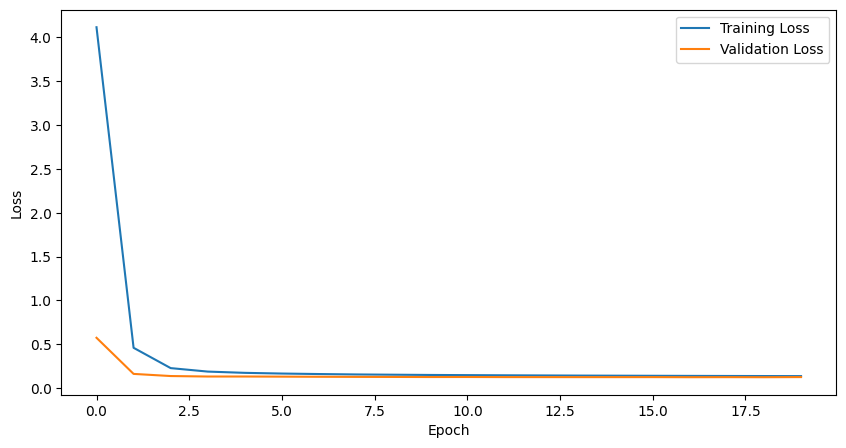

Generated Poem:
محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت نہیں محبت
BLEU Score: 98.04
ROUGE Scores: {'rouge-1': {'r': 0.9828168943734716, 'p': 0.9924560112565979, 'f': 0.9875488560154027}, 'rouge-2': {'r': 0.9807486286721313, 'p': 0.9800292123619628, 'f': 0.9803808674201197}, 'rouge-l': {'r': 0.9828168943734716, 'p': 0.9924560112565979, 'f': 0.9875488560154027}}


In [ ]:

!pip install torch torchvision torchaudio matplotlib scikit-learn nltk rouge sentencepiece


import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge import Rouge
import sentencepiece as spm
import nltk
nltk.download('punkt')


def load_urdu_poems(dataset_path):
    poems = []
    for poet in os.listdir(dataset_path):
        poet_path = os.path.join(dataset_path, poet)
        urdu_path = os.path.join(poet_path, 'ur')
        if os.path.exists(urdu_path):
            for poem_file in os.listdir(urdu_path):
                poem_path = os.path.join(urdu_path, poem_file)
                if os.path.isfile(poem_path):
                    with open(poem_path, 'r', encoding='utf-8') as f:
                        poem = f.read()
                        poems.append(poem)
    return poems


dataset_path = '/kaggle/input/urdupoetry/dataset'  
urdu_poems = load_urdu_poems(dataset_path)


with open('all_poems.txt', 'w', encoding='utf-8') as f:
    for poem in urdu_poems:
        f.write(poem + '\n')


spm.SentencePieceTrainer.Train('--input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe')


sp = spm.SentencePieceProcessor()
sp.load('urdu_bpe.model')


def tokenize_poems_bpe(poems, sp):
    tokenized_poems = []
    for poem in poems:
        tokens = sp.encode(poem, out_type=str)
        if tokens:
            tokenized_poems.append(tokens)
    return tokenized_poems

tokenized_poems = tokenize_poems_bpe(urdu_poems, sp)


vocab_size = sp.get_piece_size()
vocab = {sp.id_to_piece(i): i for i in range(vocab_size)}
inv_vocab = {i: sp.id_to_piece(i) for i in range(vocab_size)}


def tokens_to_indices(tokenized_poems, sp):
    poems_indices = []
    for tokens in tokenized_poems:
        indices = sp.piece_to_id(tokens)  
        poems_indices.append(indices)
    return poems_indices

poems_indices = tokens_to_indices(tokenized_poems, sp)


sequence_length = 50  

def create_sequences(poems_indices, sequence_length):
    inputs = []
    targets = []
    for poem in poems_indices:
        if len(poem) < sequence_length + 1:
            continue
        for i in range(len(poem) - sequence_length):
            seq_input = poem[i:i+sequence_length]
            seq_target = poem[i+1:i+sequence_length+1]
            inputs.append(seq_input)
            targets.append(seq_target)
    return inputs, targets

inputs, targets = create_sequences(poems_indices, sequence_length)


class PoetryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
            
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)
        target_seq = torch.tensor(self.targets[idx], dtype=torch.long)
        return input_seq, target_seq


train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.1, random_state=42)

train_dataset = PoetryDataset(train_inputs, train_targets)
val_dataset = PoetryDataset(val_inputs, val_targets)


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


class PoetryModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers):
        super(PoetryModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=True, batch_first=True)
        self.gru = nn.GRU(hidden_dim*2, hidden_dim, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_dim, vocab_size)
            
    def forward(self, x, hidden_lstm=None, hidden_gru=None):
        x = self.embedding(x)
        x = self.dropout(x)  
        x, hidden_lstm = self.lstm(x, hidden_lstm)
        x = self.dropout(x)  
        x, hidden_gru = self.gru(x, hidden_gru)
        x = self.dropout(x)  
        x = self.fc(x)
        return x, hidden_lstm, hidden_gru


embedding_dim = 256
hidden_dim = 512
num_layers = 2

model = PoetryModel(vocab_size, embedding_dim, hidden_dim, num_layers)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5)


def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs, _, _ = model(inputs)
        outputs = outputs.view(-1, vocab_size)
        targets = targets.view(-1)
        loss = criterion(outputs, targets)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)  
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _, _ = model(inputs)
            outputs = outputs.view(-1, vocab_size)
            targets = targets.view(-1)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)


num_epochs = 20
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = evaluate(model, val_loader, criterion)
    scheduler.step(val_loss)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break


model.load_state_dict(torch.load('best_model.pth'))


plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


def generate_text(model, start_text, sp, max_length=100, temperature=1.0):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    input_seq = torch.tensor([tokens], dtype=torch.long).to(device)
    hidden_lstm = None
    hidden_gru = None
    generated = sp.encode_as_pieces(start_text)
    for _ in range(max_length):
        outputs, hidden_lstm, hidden_gru = model(input_seq, hidden_lstm, hidden_gru)
        last_output = outputs[:, -1, :] / temperature
        probs = torch.softmax(last_output, dim=-1)
        next_token_id = torch.multinomial(probs, num_samples=1).item()
        next_word = sp.id_to_piece(next_token_id)
        generated.append(next_word)
        input_seq = torch.tensor([[next_token_id]], dtype=torch.long).to(device)
        hidden_lstm = (hidden_lstm[0].detach(), hidden_lstm[1].detach())
        hidden_gru = hidden_gru.detach()
    return sp.decode_pieces(generated)

start_text = 'محبت'
generated_poem = generate_text(model, start_text, sp, temperature=0.8)
print('Generated Poem:')
print(generated_poem)


def compute_bleu(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _, _ = model(inputs)
            outputs = outputs.argmax(dim=-1)
            for i in range(outputs.size(0)):
                target_seq = targets[i].cpu().numpy()
                output_seq = outputs[i].cpu().numpy()
                target_tokens = [inv_vocab.get(idx, '<UNK>') for idx in target_seq]
                output_tokens = [inv_vocab.get(idx, '<UNK>') for idx in output_seq]
                references.append([target_tokens])
                hypotheses.append(output_tokens)
    bleu_score = corpus_bleu(references, hypotheses, smoothing_function=SmoothingFunction().method1)
    return bleu_score

bleu_score = compute_bleu(model, val_loader)
print(f'BLEU Score: {bleu_score*100:.2f}')


def compute_rouge(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    rouge = Rouge()
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _, _ = model(inputs)
            outputs = outputs.argmax(dim=-1)
            for i in range(outputs.size(0)):
                target_seq = targets[i].cpu().numpy()
                output_seq = outputs[i].cpu().numpy()
                target_tokens = [inv_vocab.get(idx, '<UNK>') for idx in target_seq]
                output_tokens = [inv_vocab.get(idx, '<UNK>') for idx in output_seq]
                references.append(' '.join(target_tokens))
                hypotheses.append(' '.join(output_tokens))
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

rouge_scores = compute_rouge(model, val_loader)
print(f'ROUGE Scores: {rouge_scores}')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total poems loaded: 1313


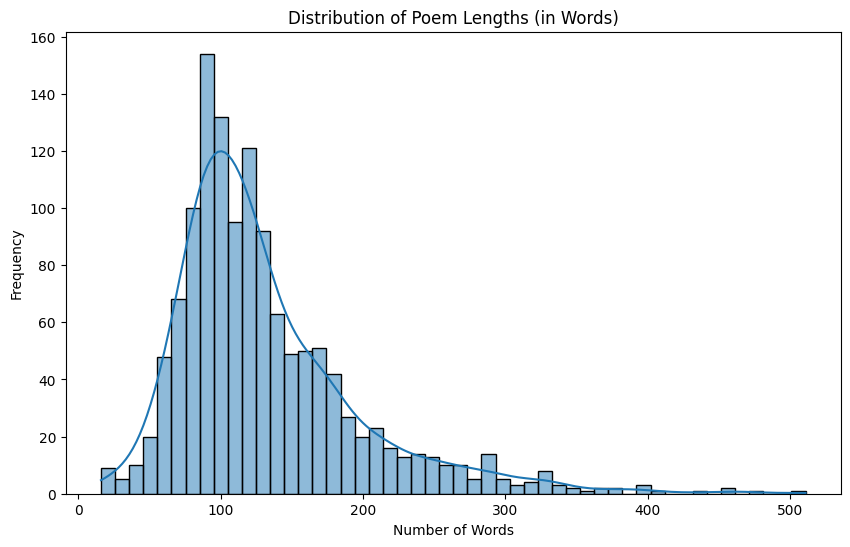

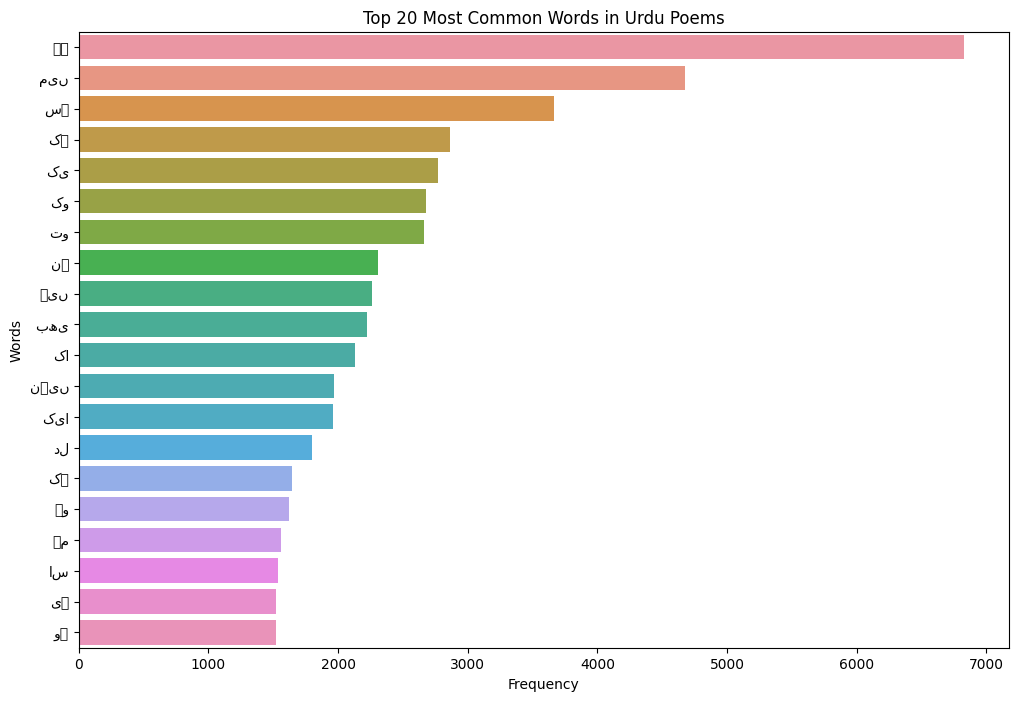

sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: all_poems.txt
  input_format: 
  model_prefix: urdu_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  

Total tokenized poems: 1313
Vocabulary Size: 8000
Unique Tokens: 7424
Vocabulary Coverage: 0.93


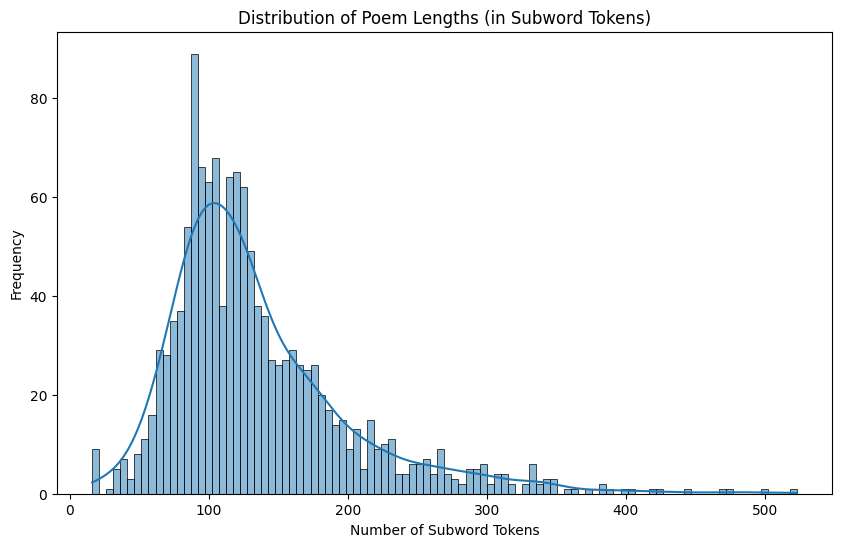

Total sequences created: 113163


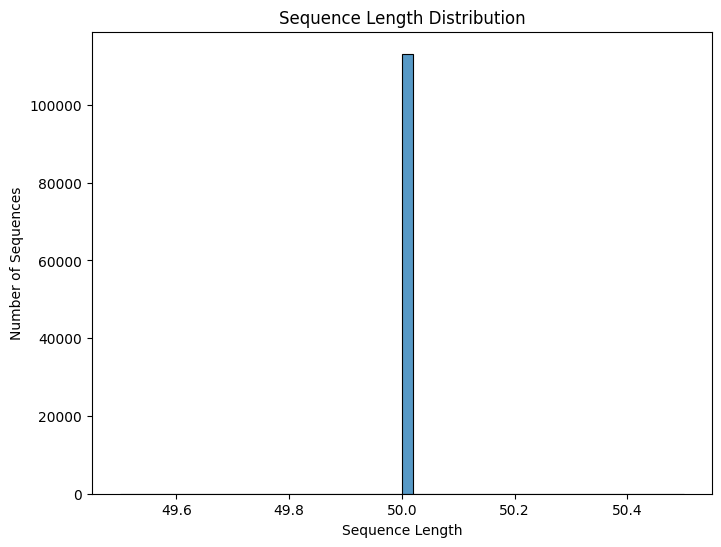

Training sequences: 101846
Validation sequences: 11317

Epoch 1/50


Train Loss: 6.8751, Val Loss: 6.6529
Best model saved.

Epoch 2/50


Train Loss: 6.5344, Val Loss: 6.5015
Best model saved.

Epoch 3/50


Train Loss: 6.2597, Val Loss: 6.4050
Best model saved.

Epoch 4/50


Train Loss: 5.9829, Val Loss: 6.3641
Best model saved.

Epoch 5/50


Train Loss: 5.6950, Val Loss: 6.3728

Epoch 6/50


Train Loss: 5.3801, Val Loss: 6.4251

Epoch 7/50


Train Loss: 5.0583, Val Loss: 6.4957

Epoch 8/50


Train Loss: 4.4688, Val Loss: 6.6100

Epoch 9/50


Train Loss: 4.1937, Val Loss: 6.6786

Epoch 10/50


Train Loss: 3.9637, Val Loss: 6.7599

Epoch 11/50


Train Loss: 3.5674, Val Loss: 6.8258

Epoch 12/50


Train Loss: 3.4173, Val Loss: 6.8763

Epoch 13/50


Train Loss: 3.2926, Val Loss: 6.9181

Epoch 14/50


Train Loss: 3.0766, Val Loss: 6.9689
Early stopping triggered


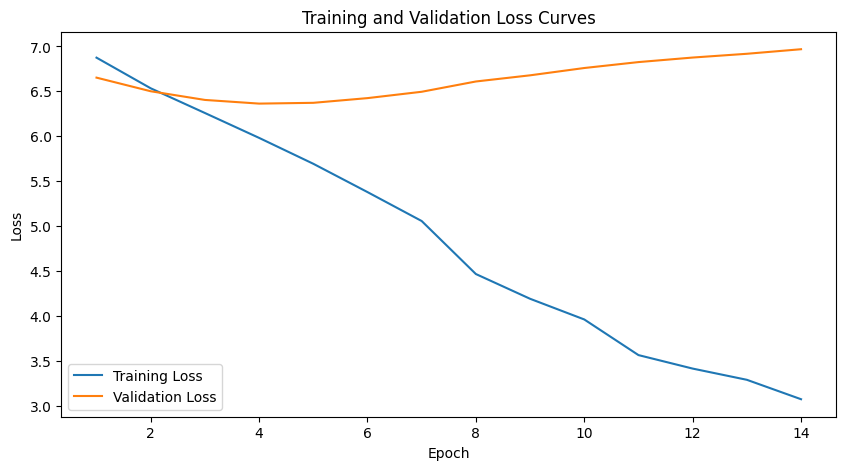

Generated Poetry with Beam Search:
محبت بارے رفتہ عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق عشق

Generated Poetry with Temperature Sampling:
محبت عداوت میں حسن میں خیال میں نے نہ چال نہ سہی میں نےوی تمام کے نشے کے واسطے تمام میں نہ میں ڈر کے ساتھ میں نے کھلا ہی میں نے دیا نے نے کچھ نے سنبھالوں نے مگر تجھے دکھاوے میں مجھے جل مجھے باد تلک مجھے نے دیا مجھے میرے گھٹ میں نے مگر نے نسبت نے کہ نے میں نہ تری تیز نے مجھے وہ فرصت کے گوشہ نے نے نے دینے نے نے کبھی ہر گلی تھی ما نے نے مجھے اک میرے احکام ما نے غریبوں دیا نے جب دیا آباد نے غلام نے



BLEU Score: 0.01



ROUGE Scores: {'rouge-1': {'r': 0.09153682719546742, 'p': 0.09153682719546742, 'f': 0.09153682673778557}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.09153682719546742, 'p': 0.09153682719546742, 'f': 0.09153682673778557}}


In [ ]:

!pip install torch torchvision torchaudio matplotlib scikit-learn nltk rouge sentencepiece transformers


import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge import Rouge
import sentencepiece as spm
import nltk
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import random
import warnings
import torch.nn.functional as F


warnings.filterwarnings('ignore')


nltk.download('punkt')


SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)


def load_urdu_poems(dataset_path):
    poems = []
    for poet in os.listdir(dataset_path):
        poet_path = os.path.join(dataset_path, poet)
        urdu_path = os.path.join(poet_path, 'ur')
        if os.path.exists(urdu_path):
            for poem_file in os.listdir(urdu_path):
                poem_path = os.path.join(urdu_path, poem_file)
                if os.path.isfile(poem_path):
                    with open(poem_path, 'r', encoding='utf-8') as f:
                        poem = f.read().strip()
                        if poem:  
                            poems.append(poem)
    return poems


dataset_path = '/kaggle/input/urdupoetry/dataset'  
urdu_poems = load_urdu_poems(dataset_path)
print(f'Total poems loaded: {len(urdu_poems)}')


sequence_lengths = [len(poem.split()) for poem in urdu_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.title('Distribution of Poem Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


all_words = ' '.join(urdu_poems).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12,8))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words in Urdu Poems')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


with open('all_poems.txt', 'w', encoding='utf-8') as f:
    for poem in urdu_poems:
        f.write(poem + '\n')


spm.SentencePieceTrainer.Train('--input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe')


sp = spm.SentencePieceProcessor()
sp.load('urdu_bpe.model')


def tokenize_poems_bpe(poems, sp):
    tokenized_poems = []
    for poem in poems:
        tokens = sp.encode(poem, out_type=str)
        if tokens:
            tokenized_poems.append(tokens)
    return tokenized_poems

tokenized_poems = tokenize_poems_bpe(urdu_poems, sp)
print(f'Total tokenized poems: {len(tokenized_poems)}')


total_tokens = sum(len(poem) for poem in tokenized_poems)
unique_tokens = len(set([token for poem in tokenized_poems for token in poem]))
coverage = unique_tokens / sp.get_piece_size()
print(f'Vocabulary Size: {sp.get_piece_size()}')
print(f'Unique Tokens: {unique_tokens}')
print(f'Vocabulary Coverage: {coverage:.2f}')


vocab_size = sp.get_piece_size()
vocab = {sp.id_to_piece(i): i for i in range(vocab_size)}
inv_vocab = {i: sp.id_to_piece(i) for i in range(vocab_size)}


def tokens_to_indices(tokenized_poems, sp):
    poems_indices = []
    for tokens in tokenized_poems:
        indices = [sp.piece_to_id(token) for token in tokens]
        poems_indices.append(indices)
    return poems_indices

poems_indices = tokens_to_indices(tokenized_poems, sp)


sequence_lengths_bpe = [len(poem) for poem in poems_indices]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths_bpe, bins=100, kde=True)
plt.title('Distribution of Poem Lengths (in Subword Tokens)')
plt.xlabel('Number of Subword Tokens')
plt.ylabel('Frequency')
plt.show()


sequence_length = 50  

def create_sequences(poems_indices, sequence_length):
    inputs = []
    targets = []
    for poem in poems_indices:
        if len(poem) < sequence_length + 1:
            continue
        for i in range(len(poem) - sequence_length):
            seq_input = poem[i:i+sequence_length]
            seq_target = poem[i+sequence_length]  
            inputs.append(seq_input)
            targets.append(seq_target)
    return inputs, targets

inputs, targets = create_sequences(poems_indices, sequence_length)
print(f'Total sequences created: {len(inputs)}')


plt.figure(figsize=(8,6))
sns.histplot([len(seq) for seq in inputs], bins=50)
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.show()


class PoetryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
            
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)
        target = torch.tensor(self.targets[idx], dtype=torch.long)  
        return input_seq, target


train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, targets, test_size=0.1, random_state=SEED
)

train_dataset = PoetryDataset(train_inputs, train_targets)
val_dataset = PoetryDataset(val_inputs, val_targets)

print(f'Training sequences: {len(train_dataset)}')
print(f'Validation sequences: {len(val_dataset)}')


batch_size = 32  

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        
        self.attn = nn.Linear(hidden_dim * 3, hidden_dim)
        self.v = nn.Linear(hidden_dim, 1, bias=False)
    
    def forward(self, hidden, encoder_outputs):
        
        
        batch_size = encoder_outputs.size(0)
        seq_len = encoder_outputs.size(1)
        
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)  
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))  
        attention = self.v(energy).squeeze(2)  
        return torch.softmax(attention, dim=1)


class PoetryModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, dropout=0.6):
        super(PoetryModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, 
                            bidirectional=True, batch_first=True, dropout=dropout)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim * 2, vocab_size)
        self.dropout = nn.Dropout(dropout)
            
    def forward(self, x, hidden=None):
        # x: [batch_size, seq_len]
        embedded = self.dropout(self.embedding(x))  
        encoder_outputs, hidden = self.lstm(embedded, hidden)  
        
        
        h_n = hidden[0]
        
        h_n_forward = h_n[-2,:,:]  
        h_n_backward = h_n[-1,:,:]  
        h_n_cat = torch.cat((h_n_forward, h_n_backward), dim=1)  
        
        attn_weights = self.attention(h_n_forward, encoder_outputs)  
        attn_weights = attn_weights.unsqueeze(1)  
        context = torch.bmm(attn_weights, encoder_outputs)  
        context = context.squeeze(1)  
        output = self.fc(context)  
        return output, hidden


embedding_dim = 256
hidden_dim = 512  
num_layers = 2    
dropout = 0.6     

model = PoetryModel(vocab_size, embedding_dim, hidden_dim, num_layers, dropout)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)  


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.5, verbose=True)


def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    for inputs, targets in tqdm(dataloader, desc="Training", leave=False):
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs, _ = model(inputs)
        loss = criterion(outputs, targets.view(-1))
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=5)  
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _ = model(inputs)
            loss = criterion(outputs, targets.view(-1))
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)


num_epochs = 50
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 10  
patience_counter = 0

for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = evaluate(model, val_loader, criterion)
    scheduler.step(val_loss)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        
        torch.save(model.state_dict(), 'best_model.pth')
        print("Best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break


model.load_state_dict(torch.load('best_model.pth', map_location=device))


plt.figure(figsize=(10,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


def top_k_top_p_filtering(logits, top_k=0, top_p=0.0, filter_value=-float('Inf')):
    
    assert logits.dim() == 2  

    if top_k > 0:
        
        topk = torch.topk(logits, top_k, dim=-1).values
        logits = torch.where(logits < topk[:, [-1]], torch.full_like(logits, filter_value), logits)

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True, dim=-1)
        cumulative_probs = F.softmax(sorted_logits, dim=-1).cumsum(dim=-1)

        
        sorted_indices_to_remove = cumulative_probs > top_p

        
        sorted_indices_to_remove[:, 1:] = sorted_indices_to_remove[:, :-1].clone()
        sorted_indices_to_remove[:, 0] = False

        
        indices_to_remove = sorted_indices_to_remove.scatter(1, sorted_indices, sorted_indices_to_remove)
        logits = logits.masked_fill(indices_to_remove, filter_value)

    return logits


def generate_text_beam_search(model, start_text, sp, max_length=100, beam_width=5, top_k=50, top_p=0.95):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()

    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        with torch.no_grad():
            outputs, _ = model(input_seq)
            logits = outputs  
            logits = top_k_top_p_filtering(logits, top_k=top_k, top_p=top_p)
            probs = torch.softmax(logits, dim=-1)
            top_probs, top_indices = torch.topk(probs, beam_width)
        
        
        next_token = top_indices[0][0].item()
        generated.append(next_token)
        
        
        if next_token == sp.piece_to_id('</s>'):
            break

    return sp.decode(generated)


def generate_text_temperature_sampling(model, start_text, sp, max_length=100, temperature=1.0):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    hidden = None  
    
    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        with torch.no_grad():
            outputs, hidden = model(input_seq, hidden)
            logits = outputs  
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)
            next_token_id = torch.multinomial(probs, num_samples=1).item()
        generated.append(next_token_id)
        
        if next_token_id == sp.piece_to_id('</s>'):
            break
    return sp.decode(generated)


start_text = 'محبت'
generated_poem = generate_text_beam_search(model, start_text, sp, max_length=100)
print('Generated Poetry with Beam Search:')
print(generated_poem)


generated_poem_temp = generate_text_temperature_sampling(model, start_text, sp, temperature=0.8)
print('\nGenerated Poetry with Temperature Sampling:')
print(generated_poem_temp)


def compute_bleu(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Computing BLEU", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _ = model(inputs)
            outputs = outputs.argmax(dim=-1)  
            for i in range(outputs.size(0)):
                target_token = targets[i].item()
                output_token = outputs[i].item()
                target_word = inv_vocab.get(target_token, '<UNK>')
                output_word = inv_vocab.get(output_token, '<UNK>')
                references.append([[target_word]])
                hypotheses.append([output_word])
    bleu_score = corpus_bleu(references, hypotheses, smoothing_function=SmoothingFunction().method1)
    return bleu_score

bleu_score = compute_bleu(model, val_loader)
print(f'\nBLEU Score: {bleu_score*100:.2f}')


def compute_rouge(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    rouge = Rouge()
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Computing ROUGE", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs, _ = model(inputs)
            outputs = outputs.argmax(dim=-1) 
            for i in range(outputs.size(0)):
                target_token = targets[i].item()
                output_token = outputs[i].item()
                target_word = inv_vocab.get(target_token, '<UNK>')
                output_word = inv_vocab.get(output_token, '<UNK>')
                references.append(target_word)
                hypotheses.append(output_word)
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

rouge_scores = compute_rouge(model, val_loader)
print(f'\nROUGE Scores: {rouge_scores}')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total poems loaded: 1313


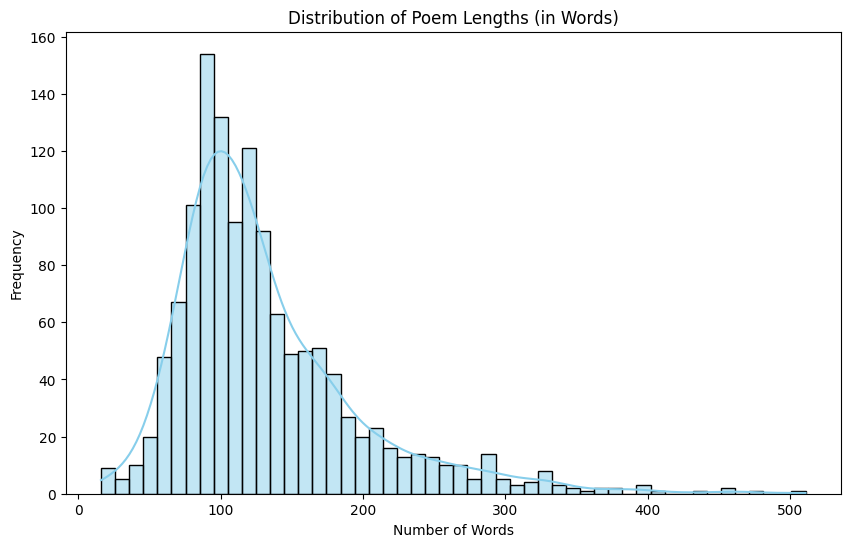

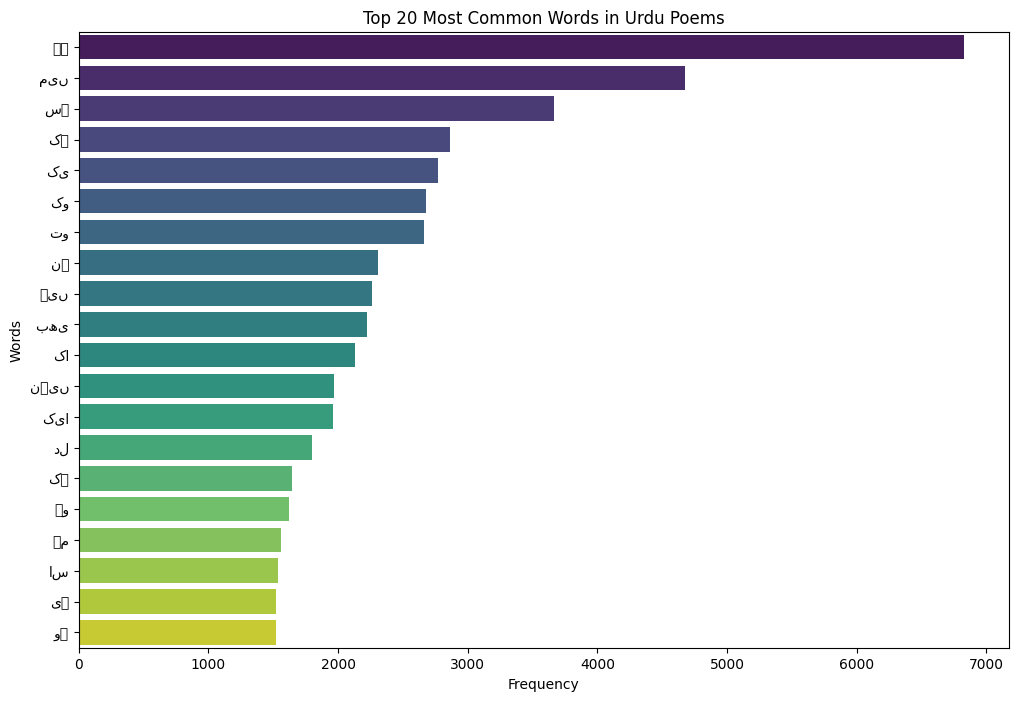

sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: all_poems.txt
  input_format: 
  model_prefix: urdu_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  

Total tokenized poems: 1313
Vocabulary Size: 8000
Unique Tokens: 7424
Vocabulary Coverage: 0.93


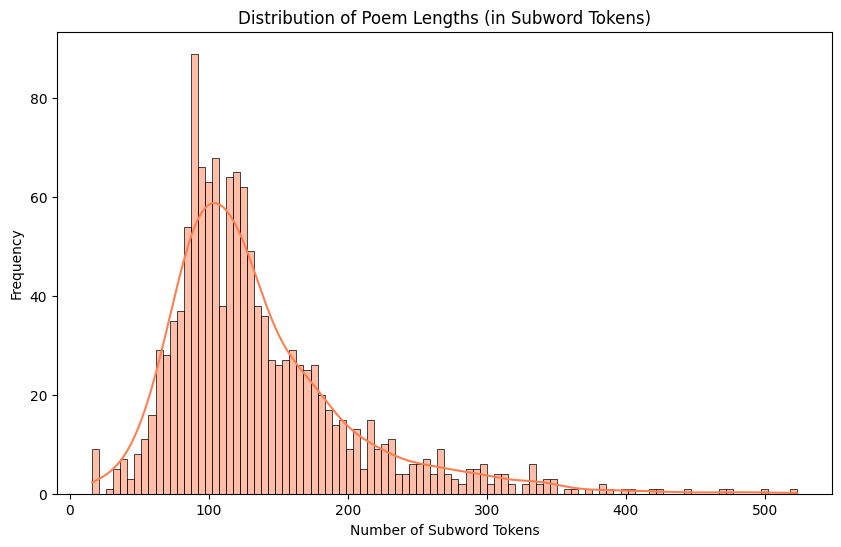

Total sequences created: 113163


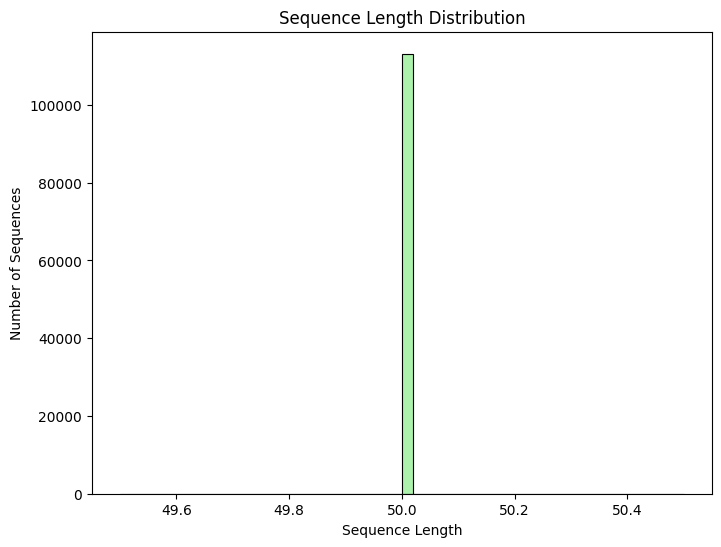

Training sequences: 101846
Validation sequences: 11317

Epoch 1/40


Train Loss: 7.0520, Val Loss: 6.9071
Best model saved.

Epoch 2/40


Train Loss: 6.8733, Val Loss: 6.9025
Best model saved.

Epoch 3/40


Train Loss: 6.8533, Val Loss: 6.9095

Epoch 4/40


Train Loss: 6.8431, Val Loss: 6.8914
Best model saved.

Epoch 5/40


Train Loss: 6.8376, Val Loss: 6.8903
Best model saved.

Epoch 6/40


Train Loss: 6.8329, Val Loss: 6.8871
Best model saved.

Epoch 7/40


Train Loss: 6.8312, Val Loss: 6.8836
Best model saved.

Epoch 8/40


Train Loss: 6.7803, Val Loss: 6.7421
Best model saved.

Epoch 9/40


Train Loss: 6.6428, Val Loss: 6.6738
Best model saved.

Epoch 10/40


Train Loss: 6.5437, Val Loss: 6.6179
Best model saved.

Epoch 11/40


Train Loss: 6.4592, Val Loss: 6.5899
Best model saved.

Epoch 12/40


Train Loss: 6.3851, Val Loss: 6.5555
Best model saved.

Epoch 13/40


Train Loss: 6.3064, Val Loss: 6.5289
Best model saved.

Epoch 14/40


Train Loss: 6.2257, Val Loss: 6.5160
Best model saved.

Epoch 15/40


Train Loss: 6.1508, Val Loss: 6.4999
Best model saved.

Epoch 16/40


Train Loss: 6.0807, Val Loss: 6.5004

Epoch 17/40


Train Loss: 6.0122, Val Loss: 6.4970
Best model saved.

Epoch 18/40


Train Loss: 5.9412, Val Loss: 6.4901
Best model saved.

Epoch 19/40


Train Loss: 5.8786, Val Loss: 6.5139

Epoch 20/40


Train Loss: 5.8144, Val Loss: 6.5514

Epoch 21/40


Train Loss: 5.7555, Val Loss: 6.5808

Epoch 22/40


Train Loss: 5.5495, Val Loss: 6.6391

Epoch 23/40


Train Loss: 5.4688, Val Loss: 6.6779
Early stopping triggered


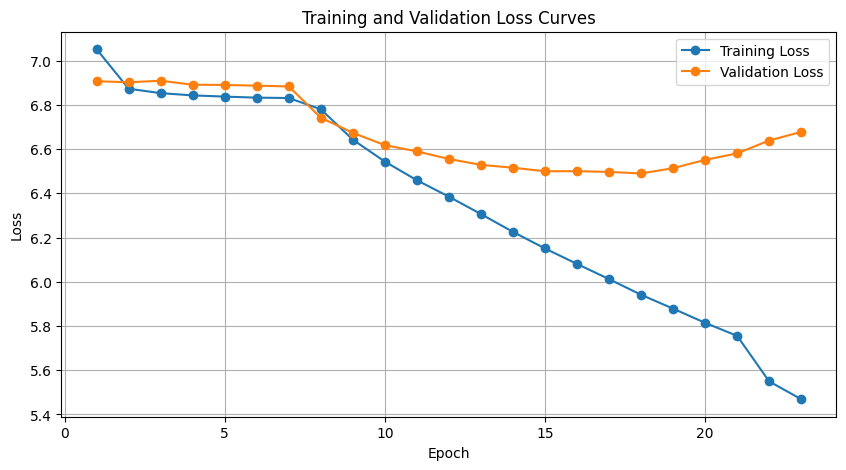

Generated Poem (Greedy Sampling):
محبت ہے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے مجھے میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں میں

Generated Poem (Temperature Sampling):
محبت سے بساط کی چشم کیوں موج نظارہ کے رو کا کچھ ہے کہ بہار کو تم کی بزم سے ہی سر جام کہ ہمیں مجاز تیرا جہاں کا عشق کو جگرؔ لقب سے ہے تجھے موسم کا بیتاب کی کبھی اے کرم ہو تو سم ہے تری اور پھر خود پر بھی ہے کہ اٹھائے ہے یہی تیری نمود و دل پر ہیں اب ہو تو اب تھا یہ یار کی بعد کیا ہوتا ہے جو بھی صاحب اور صحبت نہیں نہیں سر غم گراں نہیں نہیں یہ ایک اور بزم کو یاد ہے تو جو ہوں جو صبر ہے

Generated Poem (Top-K Sampling):
محبت بسکہ میرا بہ تھا جز ہائے جگر ہے ہے ہر مجھے کہ میری 


BLEU Score: 0.01



ROUGE Scores: {'rouge-1': {'r': 0.0634765625, 'p': 0.0634765625, 'f': 0.06347656218261799}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0634765625, 'p': 0.0634765625, 'f': 0.06347656218261799}}


In [ ]:

!pip install torch torchvision torchaudio matplotlib scikit-learn nltk rouge sentencepiece tqdm seaborn pandas


import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge import Rouge
import sentencepiece as spm
import nltk
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import random
import warnings
import numpy as np


warnings.filterwarnings('ignore')


nltk.download('punkt')


SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)


def load_urdu_poems(dataset_path):
    poems = []
    for poet in os.listdir(dataset_path):
        poet_path = os.path.join(dataset_path, poet)
        urdu_path = os.path.join(poet_path, 'ur')
        if os.path.exists(urdu_path):
            for poem_file in os.listdir(urdu_path):
                poem_path = os.path.join(urdu_path, poem_file)
                if os.path.isfile(poem_path):
                    with open(poem_path, 'r', encoding='utf-8') as f:
                        poem = f.read().strip()
                        if poem:  
                            poems.append(poem)
    return poems


dataset_path = '/kaggle/input/urdupoetry/dataset'  
urdu_poems = load_urdu_poems(dataset_path)
print(f'Total poems loaded: {len(urdu_poems)}')


sequence_lengths = [len(nltk.word_tokenize(poem)) for poem in urdu_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Poem Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


all_words = ' '.join(urdu_poems).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12,8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Urdu Poems')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


with open('all_poems.txt', 'w', encoding='utf-8') as f:
    for poem in urdu_poems:
        f.write(poem + '\n')


spm.SentencePieceTrainer.Train('--input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe')


sp = spm.SentencePieceProcessor()
sp.load('urdu_bpe.model')


def tokenize_poems_bpe(poems, sp):
    tokenized_poems = []
    for poem in poems:
        tokens = sp.encode(poem, out_type=str)
        if tokens:
            tokenized_poems.append(tokens)
    return tokenized_poems

tokenized_poems = tokenize_poems_bpe(urdu_poems, sp)
print(f'Total tokenized poems: {len(tokenized_poems)}')


total_tokens = sum(len(poem) for poem in tokenized_poems)
unique_tokens = len(set([token for poem in tokenized_poems for token in poem]))
coverage = unique_tokens / sp.get_piece_size()
print(f'Vocabulary Size: {sp.get_piece_size()}')
print(f'Unique Tokens: {unique_tokens}')
print(f'Vocabulary Coverage: {coverage:.2f}')


vocab_size = sp.get_piece_size()
vocab = {sp.id_to_piece(i): i for i in range(vocab_size)}
inv_vocab = {i: sp.id_to_piece(i) for i in range(vocab_size)}


def tokens_to_indices(tokenized_poems, sp):
    poems_indices = []
    for tokens in tokenized_poems:
        indices = [sp.piece_to_id(token) for token in tokens]
        poems_indices.append(indices)
    return poems_indices

poems_indices = tokens_to_indices(tokenized_poems, sp)


sequence_lengths_bpe = [len(poem) for poem in poems_indices]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths_bpe, bins=100, kde=True, color='coral')
plt.title('Distribution of Poem Lengths (in Subword Tokens)')
plt.xlabel('Number of Subword Tokens')
plt.ylabel('Frequency')
plt.show()


sequence_length = 50  

def create_sequences(poems_indices, sequence_length):
    inputs = []
    targets = []
    for poem in poems_indices:
        if len(poem) < sequence_length + 1:
            continue
        for i in range(len(poem) - sequence_length):
            seq_input = poem[i:i+sequence_length]
            seq_target = poem[i+sequence_length]  
            inputs.append(seq_input)
            targets.append(seq_target)
    return inputs, targets

inputs, targets = create_sequences(poems_indices, sequence_length)
print(f'Total sequences created: {len(inputs)}')


plt.figure(figsize=(8,6))
sns.histplot([len(seq) for seq in inputs], bins=50, color='lightgreen')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.show()


class PoetryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
            
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)
        target = torch.tensor(self.targets[idx], dtype=torch.long)  
        return input_seq, target


train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, targets, test_size=0.1, random_state=SEED
)

train_dataset = PoetryDataset(train_inputs, train_targets)
val_dataset = PoetryDataset(val_inputs, val_targets)

print(f'Training sequences: {len(train_dataset)}')
print(f'Validation sequences: {len(val_dataset)}')


batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


class TransformerDecoderBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout):
        super(TransformerDecoderBlock, self).__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, dropout=dropout)
        self.layer_norm1 = nn.LayerNorm(hidden_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, hidden_dim),
            nn.Dropout(dropout)
        )
        self.layer_norm2 = nn.LayerNorm(hidden_dim)
    
    def forward(self, x, mask):
        
        attn_output, _ = self.self_attn(x, x, x, attn_mask=mask)
        x = self.layer_norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + ff_output)
        return x

class DecoderOnlyTransformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_heads, ff_dim, dropout=0.1):
        super(DecoderOnlyTransformer, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(1000, embedding_dim) 
        
        self.transformer_blocks = nn.ModuleList([
            TransformerDecoderBlock(hidden_dim, num_heads, ff_dim, dropout)
            for _ in range(num_layers)
        ])
        
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)
        
        self.dropout = nn.Dropout(dropout)
        
        
        assert embedding_dim == hidden_dim, "Embedding dimension must be equal to hidden dimension"
    
    def generate_square_subsequent_mask(self, sz):
        
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask
    
    def forward(self, x):
        
        batch_size, seq_len = x.size()
        
        
        mask = self.generate_square_subsequent_mask(seq_len).to(x.device) 
        
        
        token_emb = self.token_embedding(x)  
        positions = torch.arange(0, seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        pos_emb = self.position_embedding(positions)  
        
        x = self.dropout(token_emb + pos_emb)  
        
        
        x = x.transpose(0, 1)
        
        for block in self.transformer_blocks:
            x = block(x, mask)
        
        x = self.layer_norm(x)  
        
        
        x = x.transpose(0, 1)
        
        logits = self.fc_out(x)  
        
        
        logits = logits[:, -1, :]  
        
        return logits


vocab_size = sp.get_piece_size()
embedding_dim = 512
hidden_dim = 512
num_layers = 6
num_heads = 8
ff_dim = 2048
dropout = 0.1


model = DecoderOnlyTransformer(vocab_size, embedding_dim, hidden_dim, num_layers, num_heads, ff_dim, dropout)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)


def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    for inputs, targets in tqdm(dataloader, desc="Training", leave=False):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs) 
        loss = criterion(outputs, targets)
        loss.backward()
        
        
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            outputs = model(inputs)  
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)


num_epochs = 40
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = evaluate(model, val_loader, criterion)
    scheduler.step(val_loss)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_transformer_model.pth')
        print("Best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break


model.load_state_dict(torch.load('best_transformer_model.pth', map_location=device))


plt.figure(figsize=(10,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


def generate_text_greedy(model, start_text, sp, max_length=100):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        # Prepare input
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)  
            _, next_token = torch.max(output, dim=1)
            next_token = next_token.item()
        
        generated.append(next_token)
        
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode(generated)

def generate_text_temperature_sampling(model, start_text, sp, max_length=100, temperature=1.0):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        # Prepare input
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)  
            logits = output / temperature
            probs = torch.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
        
        generated.append(next_token)
        
        # Stop if EOS token is generated
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode(generated)

def generate_text_top_k(model, start_text, sp, max_length=100, k=50):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        # Prepare input
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)  # [1, vocab_size]
            probs = torch.softmax(output, dim=-1)
            top_probs, top_indices = torch.topk(probs, k)
            top_probs = top_probs.cpu().numpy().flatten()
            top_indices = top_indices.cpu().numpy().flatten()
            
            # Normalize probabilities
            top_probs = top_probs / top_probs.sum()
            
            # Sample from the top K tokens
            next_token = int(np.random.choice(top_indices, p=top_probs))
        
        generated.append(next_token)
        
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode(generated)


start_text = 'محبت'
generated_poem_greedy = generate_text_greedy(model, start_text, sp, max_length=100)
print('Generated Poem (Greedy Sampling):')
print(generated_poem_greedy)

generated_poem_temp = generate_text_temperature_sampling(model, start_text, sp, max_length=100, temperature=0.8)
print('\nGenerated Poem (Temperature Sampling):')
print(generated_poem_temp)

generated_poem_top_k = generate_text_top_k(model, start_text, sp, max_length=100, k=50)
print('\nGenerated Poem (Top-K Sampling):')
print(generated_poem_top_k)

# Evaluation Metrics
def compute_bleu(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    smoothing = SmoothingFunction().method1
    
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Computing BLEU", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            outputs = model(inputs)  
            predicted = torch.argmax(outputs, dim=-1)  
            
            for i in range(predicted.size(0)):
                target_word = inv_vocab.get(targets[i].item(), '<UNK>')
                predicted_word = inv_vocab.get(predicted[i].item(), '<UNK>')
                
                
                references.append([nltk.word_tokenize(target_word)])
                hypotheses.append(nltk.word_tokenize(predicted_word))
    
    bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothing)
    return bleu_score

def compute_rouge(model, dataloader):
    model.eval()
    references = []
    hypotheses = []
    rouge = Rouge()
    
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Computing ROUGE", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            outputs = model(inputs)  
            predicted = torch.argmax(outputs, dim=-1)  
            
            for i in range(predicted.size(0)):
                target_word = inv_vocab.get(targets[i].item(), '<UNK>')
                predicted_word = inv_vocab.get(predicted[i].item(), '<UNK>')
                
                references.append(target_word)
                hypotheses.append(predicted_word)
    
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores


bleu_score = compute_bleu(model, val_loader)
print(f'\nBLEU Score: {bleu_score*100:.2f}')


rouge_scores = compute_rouge(model, val_loader)
print(f'\nROUGE Scores: {rouge_scores}')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total poetries loaded: 1313


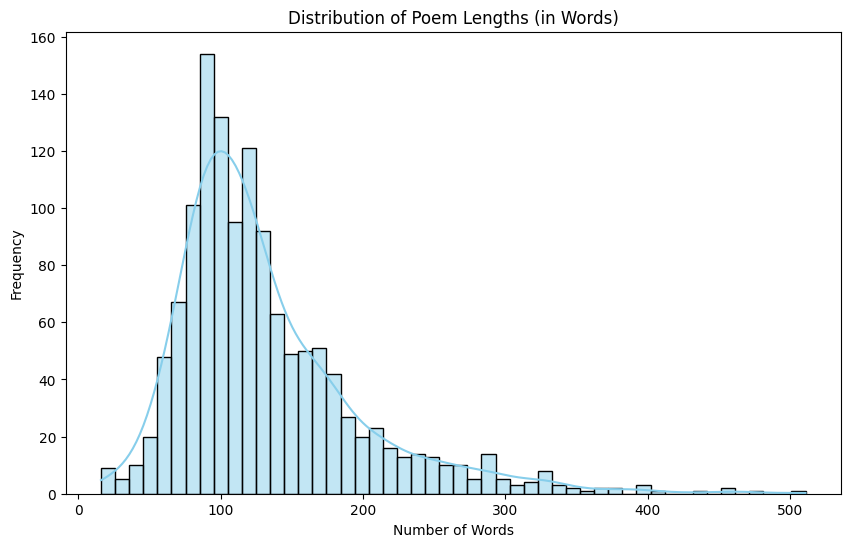

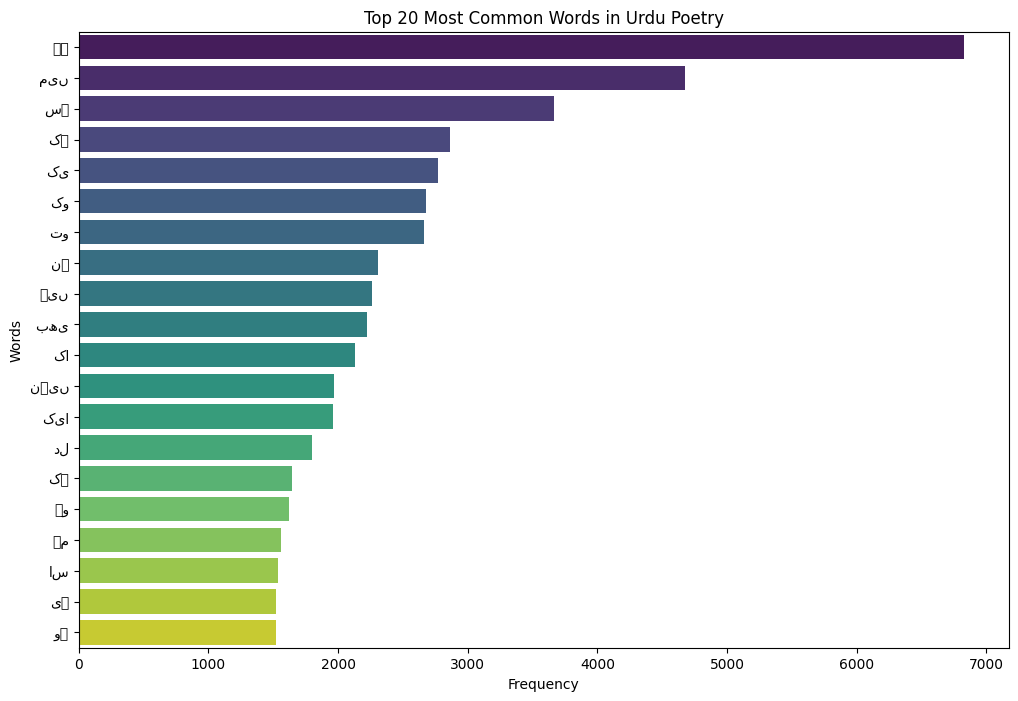

sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: all_poems.txt
  input_format: 
  model_prefix: urdu_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  

Total tokenized poems: 1313
Vocabulary Size: 8000
Unique Tokens: 7424
Vocabulary Coverage: 0.93


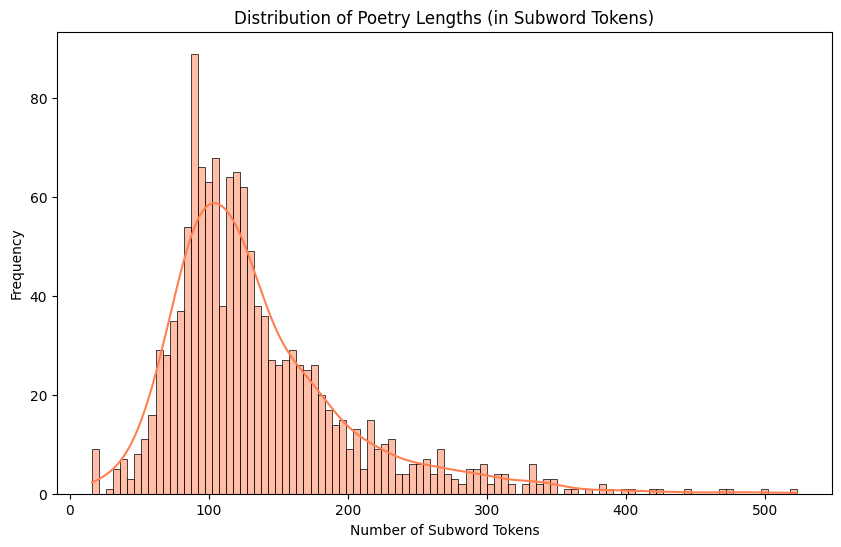

Total sequences created: 113163


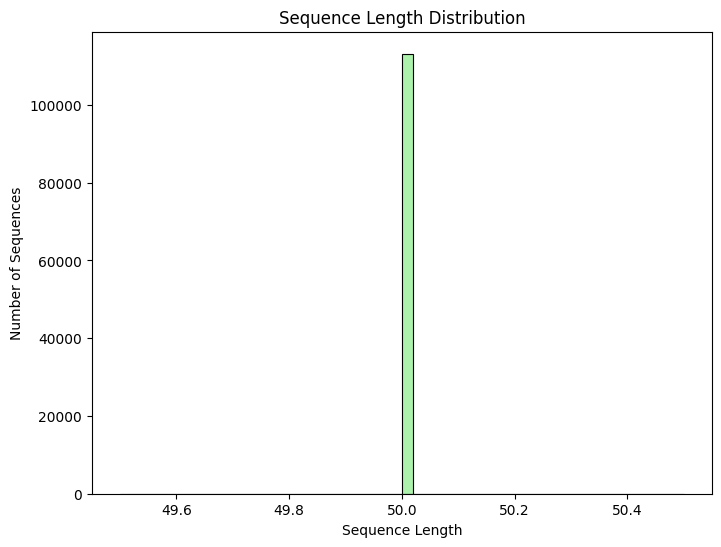

Training sequences: 101846
Validation sequences: 11317

Epoch 1/40


Train Loss: 7.4077, Val Loss: 7.0929
Best model saved.

Epoch 2/40


Train Loss: 6.9561, Val Loss: 6.8892
Best model saved.

Epoch 3/40


Train Loss: 6.6692, Val Loss: 6.7769
Best model saved.

Epoch 4/40


Train Loss: 6.3620, Val Loss: 6.7044
Best model saved.

Epoch 5/40


Train Loss: 6.0218, Val Loss: 6.6743
Best model saved.

Epoch 6/40


Train Loss: 5.6314, Val Loss: 6.7173

Epoch 7/40


Train Loss: 5.1922, Val Loss: 6.8336

Epoch 8/40


Train Loss: 4.7073, Val Loss: 7.0118

Epoch 9/40


Train Loss: 4.2021, Val Loss: 7.2580

Epoch 10/40


Train Loss: 3.7391, Val Loss: 7.5889

Epoch 11/40


Train Loss: 3.3597, Val Loss: 7.8624

Epoch 12/40


Train Loss: 3.0963, Val Loss: 8.1316
Early stopping triggered


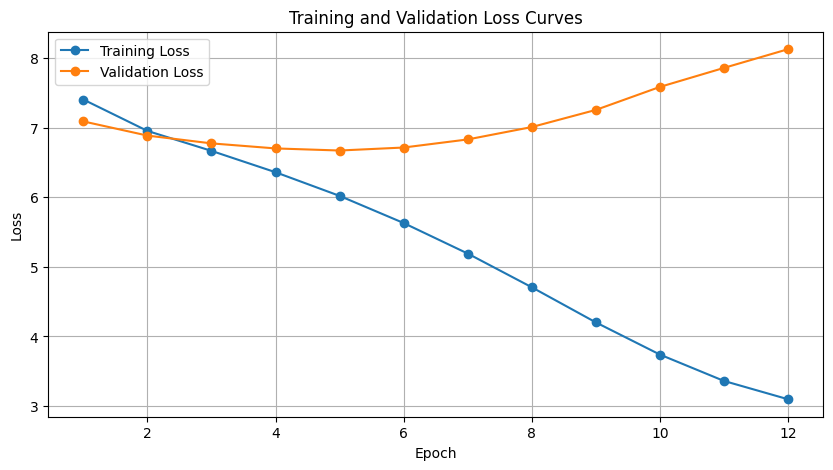

Generating References and Hypotheses: 100%|██████████| 5/5 [00:10<00:00,  2.12s/it]



BLEU-4 Score: 0.03


Generating References and Hypotheses: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]



ROUGE Scores: {'rouge-1': {'r': 1.0, 'p': 0.2592857142857143, 'f': 0.3741414113891073}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 0.2592857142857143, 'f': 0.3741414113891073}}



Perplexity: 791.79

=== Generated Poetry Samples ===

--- Method: Temperature Sampling (0.8) ---
Start Text: محبت
Generated Poem:
محبت گئے ہنسی کے دن دن تو حجاز سی کرے اور ولولہ پھر روح کوسوں رخ کی خاطر کے شہر کے آگے تو میں جو اپنے لب پہ کہتے تھے دل پہ آپ ہی تو نے گردن کو جنازہ اعجاز ہنر کی طرح آج ہی تو آندھیوں پہ اک بار ہی تو بن گی جب تک تھی سو بار وہ آبروئے کے جینا وہ ہم تو جیسے ہی مات گے ہلتے بلاؤں کو بھی رہتا ہے خدا کے سوا کچھ اس نے گھر بھر کے یاراں خس ہوئے جنگل نے گزرے کیونکر ہی جھٹلا کے نام سے آج وہ فرازؔ جب

--- Method: Top-K Sampling (k=50) ---
Start Text: خواب
Generated Poem:
خواب مجھ رخان اے دوست رنگ برق سوں گیا ہے کہ مر گیا ہے کہ ہم ہو نہ ہو گیا دل سے دور سے ہم سے کیا ہیں اب ہے گل سے مجھ سے کہہ گیا بے اختیار کہ میں ہو پر کس شمع آج بھی ہو گیا غالبؔ اور یہ جو میں ہے کہ آ گیا میں کہ غالبؔ سے بہت ہو جائیں نہ ہو یا کہ ہے وہ ہو کہ جو کچھ نہیں کہ دل ہے کہ ہم بھی اس کے بعد ہے کہ جو بھی ہو کہ یہ یہ آگ کہ ہم پر کہ نہ کریں آج

--- Method: Top-P Sampling (p=0.9) ---
Start Text: زندگی
G

In [ ]:
!pip install torch torchvision torchaudio matplotlib scikit-learn nltk rouge sentencepiece tqdm seaborn pandas sacrebleu

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge
import sentencepiece as spm
import nltk
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import random
import warnings
import numpy as np
import sacrebleu

warnings.filterwarnings('ignore')
nltk.download('punkt')

SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

def load_urdu_poems(dataset_path):
    poems = []
    for poet in os.listdir(dataset_path):
        poet_path = os.path.join(dataset_path, poet)
        urdu_path = os.path.join(poet_path, 'ur')
        if os.path.exists(urdu_path):
            for poem_file in os.listdir(urdu_path):
                poem_path = os.path.join(urdu_path, poem_file)
                if os.path.isfile(poem_path):
                    with open(poem_path, 'r', encoding='utf-8') as f:
                        poem = f.read().strip()
                        if poem:
                            poems.append(poem)
    return poems

dataset_path = '/kaggle/input/urdupoetry/dataset'
urdu_poems = load_urdu_poems(dataset_path)
print(f'Total poetries loaded: {len(urdu_poems)}')

sequence_lengths = [len(nltk.word_tokenize(poem)) for poem in urdu_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Poem Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

all_words = ' '.join(urdu_poems).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12,8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Urdu Poetry')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

with open('all_poems.txt', 'w', encoding='utf-8') as f:
    for poem in urdu_poems:
        f.write(poem + '\n')

spm.SentencePieceTrainer.Train('--input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('urdu_bpe.model')

def tokenize_poems_bpe(poems, sp):
    tokenized_poems = []
    for poem in poems:
        tokens = sp.encode(poem, out_type=int)
        if tokens:
            tokenized_poems.append(tokens)
    return tokenized_poems

tokenized_poems = tokenize_poems_bpe(urdu_poems, sp)
print(f'Total tokenized poems: {len(tokenized_poems)}')

total_tokens = sum(len(poem) for poem in tokenized_poems)
unique_tokens = len(set([token for poem in tokenized_poems for token in poem]))
coverage = unique_tokens / sp.get_piece_size()
print(f'Vocabulary Size: {sp.get_piece_size()}')
print(f'Unique Tokens: {unique_tokens}')
print(f'Vocabulary Coverage: {coverage:.2f}')

vocab_size = sp.get_piece_size()
vocab = {sp.id_to_piece(i): i for i in range(vocab_size)}
inv_vocab = {i: sp.id_to_piece(i) for i in range(vocab_size)}

sequence_lengths_bpe = [len(poem) for poem in tokenized_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths_bpe, bins=100, kde=True, color='coral')
plt.title('Distribution of Poetry Lengths (in Subword Tokens)')
plt.xlabel('Number of Subword Tokens')
plt.ylabel('Frequency')
plt.show()

sequence_length = 50

def create_sequences(poems_indices, sequence_length):
    inputs = []
    targets = []
    for poem in poems_indices:
        if len(poem) < sequence_length + 1:
            continue
        for i in range(len(poem) - sequence_length):
            seq_input = poem[i:i+sequence_length]
            seq_target = poem[i+sequence_length]
            inputs.append(seq_input)
            targets.append(seq_target)
    return inputs, targets

inputs, targets = create_sequences(tokenized_poems, sequence_length)
print(f'Total sequences created: {len(inputs)}')

plt.figure(figsize=(8,6))
sns.histplot([len(seq) for seq in inputs], bins=50, color='lightgreen')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Sequences')
plt.show()

class PoetryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
            
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)
        target = torch.tensor(self.targets[idx], dtype=torch.long)
        return input_seq, target

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, targets, test_size=0.1, random_state=SEED
)

train_dataset = PoetryDataset(train_inputs, train_targets)
val_dataset = PoetryDataset(val_inputs, val_targets)

print(f'Training sequences: {len(train_dataset)}')
print(f'Validation sequences: {len(val_dataset)}')

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

class TransformerDecoderBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout):
        super(TransformerDecoderBlock, self).__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, dropout=dropout)
        self.layer_norm1 = nn.LayerNorm(hidden_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, hidden_dim),
            nn.Dropout(dropout)
        )
        self.layer_norm2 = nn.LayerNorm(hidden_dim)
    
    def forward(self, x, mask):
        attn_output, _ = self.self_attn(x, x, x, attn_mask=mask)
        x = self.layer_norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + ff_output)
        return x

class DecoderOnlyTransformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_heads, ff_dim, dropout=0.1):
        super(DecoderOnlyTransformer, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(1000, embedding_dim)
        
        self.transformer_blocks = nn.ModuleList([
            TransformerDecoderBlock(hidden_dim, num_heads, ff_dim, dropout)
            for _ in range(num_layers)
        ])
        
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(dropout)
        assert embedding_dim == hidden_dim
    
    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask
    
    def forward(self, x):
        batch_size, seq_len = x.size()
        mask = self.generate_square_subsequent_mask(seq_len).to(x.device)
        token_emb = self.token_embedding(x)
        positions = torch.arange(0, seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        pos_emb = self.position_embedding(positions)
        x = self.dropout(token_emb + pos_emb)
        x = x.transpose(0, 1)
        
        for block in self.transformer_blocks:
            x = block(x, mask)
        
        x = self.layer_norm(x)
        x = x.transpose(0, 1)
        logits = self.fc_out(x)
        logits = logits[:, -1, :]
        return logits

config = {
    'vocab_size': sp.get_piece_size(),
    'embedding_dim': 512,
    'hidden_dim': 512,
    'num_layers': 6,
    'num_heads': 8,
    'ff_dim': 2048,
    'dropout': 0.1,
    'batch_size': 64,
    'learning_rate': 0.0003,
    'weight_decay': 1e-5,
    'label_smoothing': 0.1,
    'max_epochs': 40,
    'patience': 7
}

model = DecoderOnlyTransformer(
    vocab_size=config['vocab_size'],
    embedding_dim=config['embedding_dim'],
    hidden_dim=config['hidden_dim'],
    num_layers=config['num_layers'],
    num_heads=config['num_heads'],
    ff_dim=config['ff_dim'],
    dropout=config['dropout']
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=config['label_smoothing'])
optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])

scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=config['learning_rate'],
    steps_per_epoch=len(train_loader),
    epochs=config['max_epochs'],
    anneal_strategy='linear'
)

def train_epoch(model, dataloader, criterion, optimizer, scheduler):
    model.train()
    epoch_loss = 0
    for inputs, targets in tqdm(dataloader, desc="Training", leave=False):
        inputs = inputs.to(device)
        targets = targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        
        epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            epoch_loss += loss.item()
    return epoch_loss / len(dataloader)

num_epochs = config['max_epochs']
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = config['patience']
patience_counter = 0

for epoch in range(num_epochs):
    print(f'\nEpoch {epoch+1}/{num_epochs}')
    train_loss = train_epoch(model, train_loader, criterion, optimizer, scheduler)
    val_loss = evaluate(model, val_loader, criterion)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_transformer_model.pth')
        print("Best model saved.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

model.load_state_dict(torch.load('best_transformer_model.pth', map_location=device))

plt.figure(figsize=(10,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

def generate_text_greedy(model, start_text, sp, max_length=100):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)
            _, next_token = torch.max(output, dim=1)
            next_token = int(next_token.item())
        
        generated.append(next_token)
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode_ids(generated)

def generate_text_temperature_sampling(model, start_text, sp, max_length=100, temperature=1.0):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)
            logits = output / temperature
            probs = torch.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
            next_token = int(next_token)
        
        generated.append(next_token)
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode_ids(generated)

def generate_text_top_k(model, start_text, sp, max_length=100, k=50):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)
            probs = torch.softmax(output, dim=-1)
            top_probs, top_indices = torch.topk(probs, k)
            top_probs = top_probs.cpu().numpy().flatten()
            top_indices = top_indices.cpu().numpy().flatten()
            
            top_probs = top_probs / top_probs.sum()
            next_token = np.random.choice(top_indices, p=top_probs)
            next_token = int(next_token)
        
        generated.append(next_token)
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode_ids(generated)

def generate_text_top_p(model, start_text, sp, max_length=100, p=0.9):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = tokens.copy()
    
    for _ in range(max_length):
        input_seq = torch.tensor([generated[-sequence_length:]], dtype=torch.long).to(device)
        
        with torch.no_grad():
            output = model(input_seq)
            logits = output.squeeze(0)
            sorted_logits, sorted_indices = torch.sort(logits, descending=True)
            sorted_probs = torch.softmax(sorted_logits, dim=-1)
            cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
            
            sorted_indices_to_remove = cumulative_probs > p
            sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
            sorted_indices_to_remove[..., 0] = False
            
            indices_to_remove = sorted_indices_to_remove.scatter(0, sorted_indices, sorted_indices_to_remove)
            logits[indices_to_remove] = -float('Inf')
            
            probs = torch.softmax(logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1).item()
            next_token = int(next_token)
        
        generated.append(next_token)
        
        if next_token == sp.piece_to_id('</s>'):
            break
    
    return sp.decode_ids(generated)

def generate_text_beam_search(model, start_text, sp, max_length=100, beam_width=5):
    model.eval()
    tokens = sp.encode(start_text, out_type=int)
    generated = [[tokens.copy(), 0.0]]
    
    for _ in range(max_length):
        all_candidates = []
        for seq, score in generated:
            input_seq = torch.tensor([seq[-sequence_length:]], dtype=torch.long).to(device)
            with torch.no_grad():
                output = model(input_seq)
                probs = torch.softmax(output, dim=-1).squeeze(0)
            top_probs, top_indices = torch.topk(probs, beam_width)
            top_probs = top_probs.cpu().numpy()
            top_indices = top_indices.cpu().numpy()
            
            for prob, idx in zip(top_probs, top_indices):
                candidate_seq = seq + [idx]
                candidate_score = score - np.log(prob + 1e-10)
                all_candidates.append([candidate_seq, candidate_score])
        
        ordered = sorted(all_candidates, key=lambda tup: tup[1])
        generated = ordered[:beam_width]
        
        completed = any(seq[-1] == sp.piece_to_id('</s>') for seq, _ in generated)
        if completed:
            break
    
    best_sequence = min(generated, key=lambda tup: tup[1])[0]
    best_sequence = [int(token) for token in best_sequence]
    return sp.decode_ids(best_sequence)

def compute_bleu_score_sacrebleu(model, sp, start_texts, num_samples=5, max_length=100):
    model.eval()
    references = []
    hypotheses = []
    
    for start_text in tqdm(start_texts, desc="Generating References and Hypotheses"):
        ref_text = start_text
        generated_texts = [generate_text_greedy(model, start_text, sp, max_length=max_length) for _ in range(num_samples)]
        for gen_text in generated_texts:
            references.append(ref_text)
            hypotheses.append(gen_text)
    
    sacre_references = [references]
    bleu4 = sacrebleu.corpus_bleu(hypotheses, sacre_references).score
    
    return bleu4

def compute_rouge_score(model, sp, start_texts, max_length=100):
    model.eval()
    references = []
    hypotheses = []
    rouge = Rouge()
    
    for start_text in tqdm(start_texts, desc="Generating References and Hypotheses"):
        ref_text = start_text
        gen_text = generate_text_greedy(model, start_text, sp, max_length=max_length)
        references.append(ref_text)
        hypotheses.append(gen_text)
    
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

start_texts_eval = ['محبت', 'خواب', 'زندگی', 'خوشی', 'غم']

bleu_score = compute_bleu_score_sacrebleu(model, sp, start_texts_eval, num_samples=5, max_length=100)
print(f'\nBLEU-4 Score: {bleu_score:.2f}')

rouge_scores = compute_rouge_score(model, sp, start_texts_eval, max_length=100)
print(f'\nROUGE Scores: {rouge_scores}')

def compute_perplexity(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    total_tokens = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Computing Perplexity", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item() * inputs.size(0)
            total_tokens += inputs.size(0)
    avg_loss = total_loss / total_tokens
    perplexity = math.exp(avg_loss)
    return perplexity

perplexity = compute_perplexity(model, val_loader, criterion)
print(f'\nPerplexity: {perplexity:.2f}')

start_texts_generate = ['محبت', 'خواب', 'زندگی', 'خوشی']

generation_methods = [
    ('Temperature Sampling (0.8)', lambda model, start: generate_text_temperature_sampling(model, start, sp, max_length=100, temperature=0.8)),
    ('Top-K Sampling (k=50)', lambda model, start: generate_text_top_k(model, start, sp, max_length=100, k=50)),
    ('Top-P Sampling (p=0.9)', lambda model, start: generate_text_top_p(model, start, sp, max_length=100, p=0.9))
]

print("\n=== Generated Poetry Samples ===")
for start_text, method in zip(start_texts_generate, generation_methods):
    generated_poem = method[1](model, start_text)
    print(f"\n--- Method: {method[0]} ---")
    print(f"Start Text: {start_text}")
    print(f"Generated Poem:\n{generated_poem}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 7.5 MB/s eta 0:00:00
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total poetries loaded: 1313


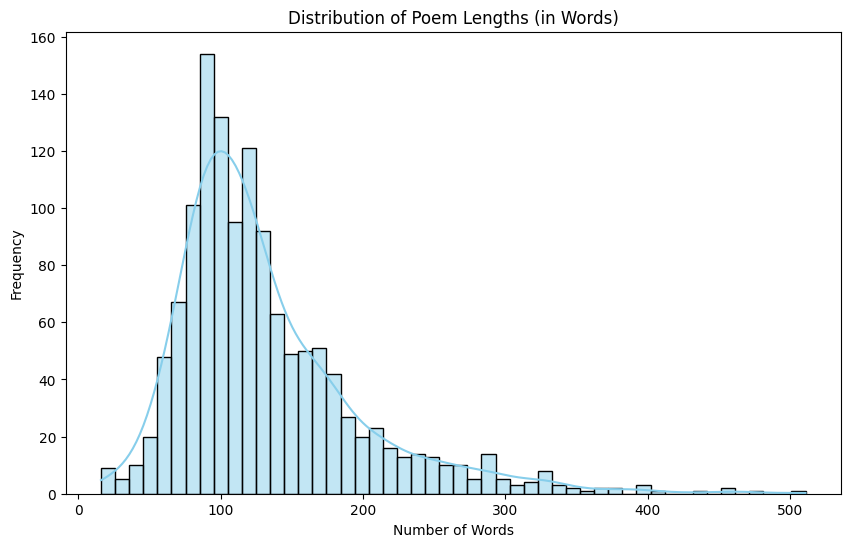

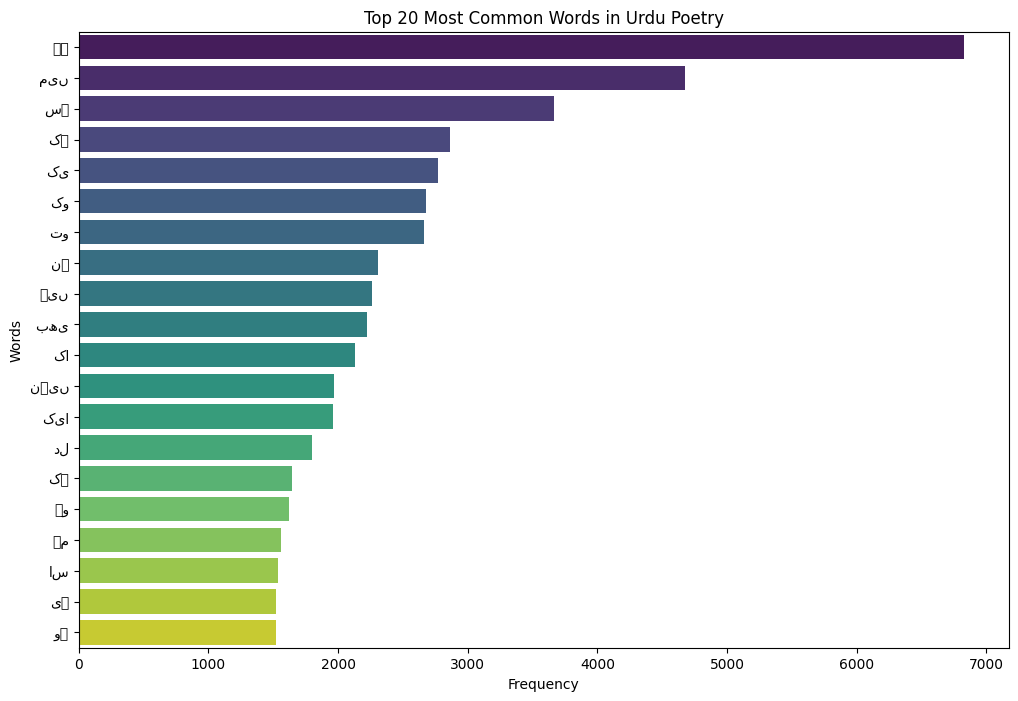

sentencepiece_trainer.cc(178) LOG(INFO) Running command: --input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe
sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: all_poems.txt
  input_format: 
  model_prefix: urdu_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  

Total tokenized poems: 1313
Vocabulary Size: 8000
Unique Tokens: 7424
Vocabulary Coverage: 0.93


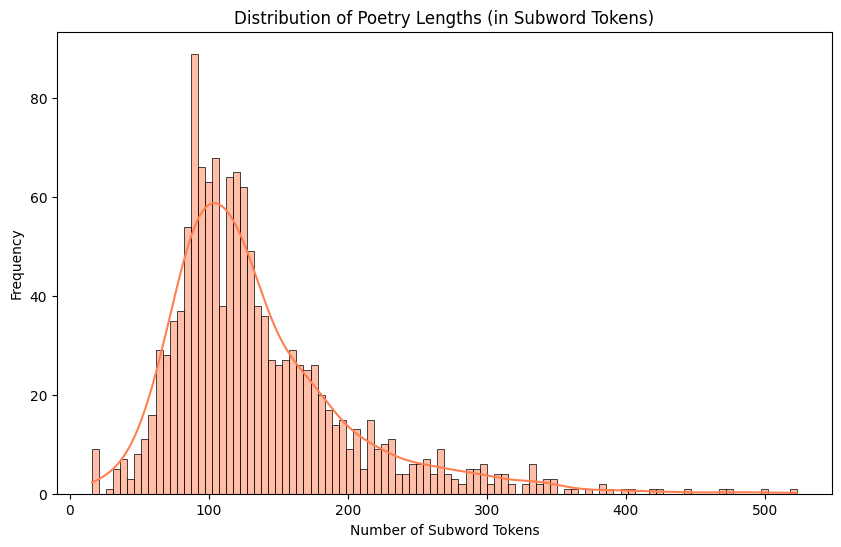


--- Fold 1 ---
Training sequences: 76552
Validation sequences: 36611
Model is using device: cuda

Epoch 1/30


Train Loss: 7.3511, Val Loss: 7.2367
Initial validation loss set to 7.2367

Epoch 2/30


Train Loss: 7.2051, Val Loss: 7.2243
Validation loss decreased to 7.2243. Resetting counter.

Epoch 3/30


Train Loss: 7.1911, Val Loss: 7.2158
Validation loss decreased to 7.2158. Resetting counter.

Epoch 4/30


Train Loss: 7.1862, Val Loss: 7.2121
Validation loss decreased to 7.2121. Resetting counter.

Epoch 5/30


Train Loss: 7.1792, Val Loss: 7.2100
Validation loss decreased to 7.2100. Resetting counter.

Epoch 6/30


Train Loss: 7.1845, Val Loss: 7.2134
Validation loss did not improve. Counter: 1/10

Epoch 7/30


Train Loss: 7.1792, Val Loss: 7.2080
Validation loss decreased to 7.2080. Resetting counter.

Epoch 8/30


Train Loss: 7.1773, Val Loss: 7.2084
Validation loss did not improve. Counter: 1/10

Epoch 9/30


Train Loss: 7.1773, Val Loss: 7.2046
Validation loss decreased to 7.2046. Resetting counter.

Epoch 10/30


Train Loss: 7.1776, Val Loss: 7.2078
Validation loss did not improve. Counter: 1/10

Epoch 11/30


Train Loss: 7.1747, Val Loss: 7.2079
Validation loss did not improve. Counter: 2/10

Epoch 12/30


Train Loss: 7.1742, Val Loss: 7.2079
Validation loss did not improve. Counter: 3/10

Epoch 13/30


Train Loss: 7.1763, Val Loss: 7.2063
Validation loss did not improve. Counter: 4/10

Epoch 14/30


Train Loss: 7.1614, Val Loss: 7.2040
Validation loss decreased to 7.2040. Resetting counter.

Epoch 15/30


Train Loss: 7.1621, Val Loss: 7.2035
Validation loss decreased to 7.2035. Resetting counter.

Epoch 16/30


Train Loss: 7.1626, Val Loss: 7.2035
Validation loss decreased to 7.2035. Resetting counter.

Epoch 17/30


Train Loss: 7.1618, Val Loss: 7.2034
Validation loss decreased to 7.2034. Resetting counter.

Epoch 18/30


Train Loss: 7.1612, Val Loss: 7.2036
Validation loss did not improve. Counter: 1/10

Epoch 19/30


Train Loss: 7.1620, Val Loss: 7.2038
Validation loss did not improve. Counter: 2/10

Epoch 20/30


Train Loss: 7.1559, Val Loss: 7.2025
Validation loss decreased to 7.2025. Resetting counter.

Epoch 21/30


Train Loss: 7.1552, Val Loss: 7.2021
Validation loss decreased to 7.2021. Resetting counter.

Epoch 22/30


Train Loss: 7.1548, Val Loss: 7.2022
Validation loss did not improve. Counter: 1/10

Epoch 23/30


Train Loss: 7.1549, Val Loss: 7.2024
Validation loss did not improve. Counter: 2/10

Epoch 24/30


Train Loss: 7.1549, Val Loss: 7.2016
Validation loss decreased to 7.2016. Resetting counter.

Epoch 25/30


Train Loss: 7.1548, Val Loss: 7.2021
Validation loss did not improve. Counter: 1/10

Epoch 26/30


Train Loss: 7.1543, Val Loss: 7.2016
Validation loss decreased to 7.2016. Resetting counter.

Epoch 27/30


Train Loss: 7.1546, Val Loss: 7.2018
Validation loss did not improve. Counter: 1/10

Epoch 28/30


Train Loss: 7.1546, Val Loss: 7.2019
Validation loss did not improve. Counter: 2/10

Epoch 29/30


Train Loss: 7.1519, Val Loss: 7.2022
Validation loss did not improve. Counter: 3/10

Epoch 30/30


Train Loss: 7.1519, Val Loss: 7.2025
Validation loss did not improve. Counter: 4/10



Fold 1 BLEU-4 Score: 7.77
Fold 1 ROUGE Scores: {'rouge-1': {'r': 1.0, 'p': 0.9777777777777779, 'f': 0.9882352891211074}, 'rouge-2': {'r': 1.0, 'p': 0.8181818181818181, 'f': 0.8999999950500002}, 'rouge-l': {'r': 1.0, 'p': 0.9777777777777779, 'f': 0.9882352891211074}}
Fold 1 Perplexity: 1342.83

--- Fold 2 ---
Training sequences: 74944
Validation sequences: 38219
Model is using device: cuda

Epoch 1/30


Train Loss: 7.3272, Val Loss: 7.2836
Initial validation loss set to 7.2836

Epoch 2/30


Train Loss: 7.1855, Val Loss: 7.2578
Validation loss decreased to 7.2578. Resetting counter.

Epoch 3/30


Train Loss: 7.1682, Val Loss: 7.2541
Validation loss decreased to 7.2541. Resetting counter.

Epoch 4/30


Train Loss: 7.1643, Val Loss: 7.2548
Validation loss did not improve. Counter: 1/10

Epoch 5/30


Train Loss: 7.1664, Val Loss: 7.2600
Validation loss did not improve. Counter: 2/10

Epoch 6/30


Train Loss: 7.1596, Val Loss: 7.2513
Validation loss decreased to 7.2513. Resetting counter.

Epoch 7/30


Train Loss: 7.1602, Val Loss: 7.2502
Validation loss decreased to 7.2502. Resetting counter.

Epoch 8/30


Train Loss: 7.1595, Val Loss: 7.2519
Validation loss did not improve. Counter: 1/10

Epoch 9/30


Train Loss: 7.1573, Val Loss: 7.2510
Validation loss did not improve. Counter: 2/10

Epoch 10/30


Train Loss: 7.1561, Val Loss: 7.2529
Validation loss did not improve. Counter: 3/10

Epoch 11/30


Train Loss: 7.1560, Val Loss: 7.2502
Validation loss decreased to 7.2502. Resetting counter.

Epoch 12/30


Train Loss: 7.1468, Val Loss: 7.2464
Validation loss decreased to 7.2464. Resetting counter.

Epoch 13/30


Train Loss: 7.1434, Val Loss: 7.2460
Validation loss decreased to 7.2460. Resetting counter.

Epoch 14/30


Train Loss: 7.1427, Val Loss: 7.2457
Validation loss decreased to 7.2457. Resetting counter.

Epoch 15/30


Train Loss: 7.1413, Val Loss: 7.2453
Validation loss decreased to 7.2453. Resetting counter.

Epoch 16/30


Train Loss: 7.1416, Val Loss: 7.2451
Validation loss decreased to 7.2451. Resetting counter.

Epoch 17/30


Train Loss: 7.1410, Val Loss: 7.2445
Validation loss decreased to 7.2445. Resetting counter.

Epoch 18/30


Train Loss: 7.1406, Val Loss: 7.2441
Validation loss decreased to 7.2441. Resetting counter.

Epoch 19/30


Train Loss: 7.1406, Val Loss: 7.2439
Validation loss decreased to 7.2439. Resetting counter.

Epoch 20/30


Train Loss: 7.1398, Val Loss: 7.2436
Validation loss decreased to 7.2436. Resetting counter.

Epoch 21/30


Train Loss: 7.1397, Val Loss: 7.2442
Validation loss did not improve. Counter: 1/10

Epoch 22/30


Train Loss: 7.1399, Val Loss: 7.2450
Validation loss did not improve. Counter: 2/10

Epoch 23/30


Train Loss: 7.1397, Val Loss: 7.2457
Validation loss did not improve. Counter: 3/10

Epoch 24/30


Train Loss: 7.1400, Val Loss: 7.2451
Validation loss did not improve. Counter: 4/10

Epoch 25/30


Train Loss: 7.1348, Val Loss: 7.2440
Validation loss did not improve. Counter: 5/10

Epoch 26/30


Train Loss: 7.1344, Val Loss: 7.2445
Validation loss did not improve. Counter: 6/10

Epoch 27/30


Train Loss: 7.1340, Val Loss: 7.2435
Validation loss decreased to 7.2435. Resetting counter.

Epoch 28/30


Train Loss: 7.1341, Val Loss: 7.2446
Validation loss did not improve. Counter: 1/10

Epoch 29/30


Train Loss: 7.1314, Val Loss: 7.2439
Validation loss did not improve. Counter: 2/10

Epoch 30/30


Train Loss: 7.1311, Val Loss: 7.2437
Validation loss did not improve. Counter: 3/10



Fold 2 BLEU-4 Score: 7.59
Fold 2 ROUGE Scores: {'rouge-1': {'r': 1.0, 'p': 0.9072727272727272, 'f': 0.9513784411271287}, 'rouge-2': {'r': 1.0, 'p': 0.8145454545454547, 'f': 0.8977777728301236}, 'rouge-l': {'r': 1.0, 'p': 0.9072727272727272, 'f': 0.9513784411271287}}
Fold 2 Perplexity: 1399.30

--- Fold 3 ---
Training sequences: 74830
Validation sequences: 38333
Model is using device: cuda

Epoch 1/30


Train Loss: 7.3457, Val Loss: 7.2666
Initial validation loss set to 7.2666

Epoch 2/30


Train Loss: 7.2018, Val Loss: 7.2369
Validation loss decreased to 7.2369. Resetting counter.

Epoch 3/30


Train Loss: 7.1837, Val Loss: 7.2308
Validation loss decreased to 7.2308. Resetting counter.

Epoch 4/30


Train Loss: 7.1784, Val Loss: 7.2271
Validation loss decreased to 7.2271. Resetting counter.

Epoch 5/30


Train Loss: 7.1752, Val Loss: 7.2285
Validation loss did not improve. Counter: 1/10

Epoch 6/30


Train Loss: 7.1713, Val Loss: 7.2274
Validation loss did not improve. Counter: 2/10

Epoch 7/30


Train Loss: 7.1733, Val Loss: 7.2296
Validation loss did not improve. Counter: 3/10

Epoch 8/30


Train Loss: 7.1734, Val Loss: 7.2301
Validation loss did not improve. Counter: 4/10

Epoch 9/30


Train Loss: 7.1627, Val Loss: 7.2281
Validation loss did not improve. Counter: 5/10

Epoch 10/30


Train Loss: 7.1576, Val Loss: 7.2246
Validation loss decreased to 7.2246. Resetting counter.

Epoch 11/30


Train Loss: 7.1539, Val Loss: 7.2242
Validation loss decreased to 7.2242. Resetting counter.

Epoch 12/30


Train Loss: 7.1563, Val Loss: 7.2249
Validation loss did not improve. Counter: 1/10

Epoch 13/30


Train Loss: 7.1585, Val Loss: 7.2244
Validation loss did not improve. Counter: 2/10

Epoch 14/30


Train Loss: 7.1566, Val Loss: 7.2244
Validation loss did not improve. Counter: 3/10

Epoch 15/30


Train Loss: 7.1489, Val Loss: 7.2231
Validation loss decreased to 7.2231. Resetting counter.

Epoch 16/30


Train Loss: 7.1490, Val Loss: 7.2236
Validation loss did not improve. Counter: 1/10

Epoch 17/30


Train Loss: 7.1495, Val Loss: 7.2234
Validation loss did not improve. Counter: 2/10

Epoch 18/30


Train Loss: 7.1492, Val Loss: 7.2241
Validation loss did not improve. Counter: 3/10

Epoch 19/30


Train Loss: 7.1491, Val Loss: 7.2243
Validation loss did not improve. Counter: 4/10

Epoch 20/30


Train Loss: 7.1463, Val Loss: 7.2234
Validation loss did not improve. Counter: 5/10

Epoch 21/30


Train Loss: 7.1466, Val Loss: 7.2232
Validation loss did not improve. Counter: 6/10

Epoch 22/30


Train Loss: 7.1458, Val Loss: 7.2230
Validation loss decreased to 7.2230. Resetting counter.

Epoch 23/30


Train Loss: 7.1454, Val Loss: 7.2229
Validation loss decreased to 7.2229. Resetting counter.

Epoch 24/30


Train Loss: 7.1436, Val Loss: 7.2225
Validation loss decreased to 7.2225. Resetting counter.

Epoch 25/30


Train Loss: 7.1434, Val Loss: 7.2223
Validation loss decreased to 7.2223. Resetting counter.

Epoch 26/30


Train Loss: 7.1435, Val Loss: 7.2222
Validation loss decreased to 7.2222. Resetting counter.

Epoch 27/30


Train Loss: 7.1434, Val Loss: 7.2222
Validation loss did not improve. Counter: 1/10

Epoch 28/30


Train Loss: 7.1432, Val Loss: 7.2223
Validation loss did not improve. Counter: 2/10

Epoch 29/30


Train Loss: 7.1429, Val Loss: 7.2222
Validation loss did not improve. Counter: 3/10

Epoch 30/30


Train Loss: 7.1424, Val Loss: 7.2221
Validation loss decreased to 7.2221. Resetting counter.



Fold 3 BLEU-4 Score: 7.59
Fold 3 ROUGE Scores: {'rouge-1': {'r': 1.0, 'p': 0.9218181818181819, 'f': 0.9588972381183474}, 'rouge-2': {'r': 1.0, 'p': 0.8145454545454547, 'f': 0.8977777728301236}, 'rouge-l': {'r': 1.0, 'p': 0.9218181818181819, 'f': 0.9588972381183474}}
Fold 3 Perplexity: 1369.33

=== k-Fold Cross-Validation Results ===

Train_loss:
  Epoch 1: 7.3413 ± 0.0103
  Epoch 2: 7.1974 ± 0.0086
  Epoch 3: 7.1810 ± 0.0095
  Epoch 4: 7.1763 ± 0.0091
  Epoch 5: 7.1736 ± 0.0054
  Epoch 6: 7.1718 ± 0.0102
  Epoch 7: 7.1709 ± 0.0079
  Epoch 8: 7.1701 ± 0.0076
  Epoch 9: 7.1658 ± 0.0084
  Epoch 10: 7.1638 ± 0.0098
  Epoch 11: 7.1615 ± 0.0094
  Epoch 12: 7.1591 ± 0.0114
  Epoch 13: 7.1594 ± 0.0134
  Epoch 14: 7.1536 ± 0.0079
  Epoch 15: 7.1508 ± 0.0086
  Epoch 16: 7.1511 ± 0.0087
  Epoch 17: 7.1508 ± 0.0085
  Epoch 18: 7.1503 ± 0.0084
  Epoch 19: 7.1506 ± 0.0088
  Epoch 20: 7.1474 ± 0.0066
  Epoch 21: 7.1472 ± 0.0063
  Epoch 22: 7.1468 ± 0.0061
  Epoch 23: 7.1466 ± 0.0063
  Epoch 24: 7.14

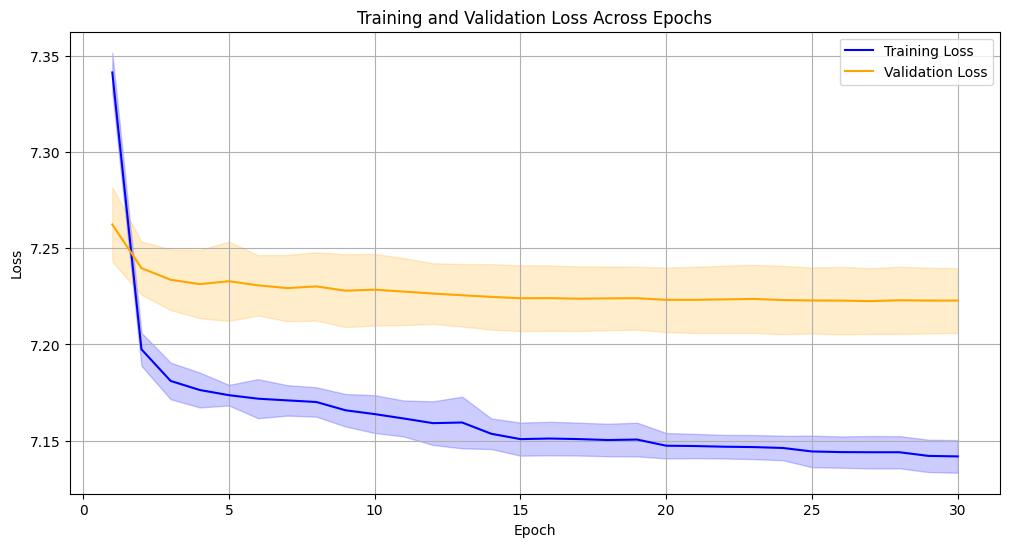


=== Generated Poetry Samples (Last Fold) ===

--- Method: Temperature Sampling (0.8) ---
Start Text: جنوں کے ولولے جب گھٹ گئے دل میں نہاں ہو
Generated Poetry:
جنوں کے ولولے جب گھٹ گئے دل میں نہاں ہو نے یہ ہوا آؤ کی کے زخم پہ دی مجھوں گیا جب میں شاید دیکھ کی نہ کے چہرہ تھا ہماری پوچھ بن سے اپنی میں تو ہے ہونٹوں شراب مجھے روز جو میں بھی سونا کے حال کا گئی تک دیکھنا تو کیوں سا ہے دل کے ہےۂ ہے میں کس صورت لگا بھی ہے میری ساتھ کی ہے کسی دامن غبار بہت ہے پر ہے میں سے زنداں بھی بے ابتدا بھی دیکھیے سے ہے پر وہ پیہم اپنی اس ہوں ولیکن ہے و حوصلۂ ہے بھی کے سے ہے اب ہے جی کیا ولیؔ رہا

--- Method: Top-K Sampling (k=50) ---
Start Text: یہ ہوا مآل حباب کا جو ہوا میں بھر کے
Generated Poetry:
یہ ہوا مآل حباب کا جو ہوا میں بھر کے نہ جب و ہو میں میں ہے اب ہو نے ہے غم پر سے سے سے کو نہیں ہیں کے ہو میں کے تو ہیں ہوں سے کیا ہو ہے ہو سے ہے عشق غم ہی کو ہے یہ ہیں میں کیا ہے اے کے ہم کو نہیں دل سے غم کر اک ہوا ہو ہر ہے سے ہے کو نہ کے پر تو کے نہیں میں ہی ہے تھی کر سے ہے کوئی نے و کر ہے تو میں اب اس کو ہے کو 

In [ ]:
!pip install torch torchvision torchaudio matplotlib scikit-learn nltk rouge sentencepiece tqdm seaborn pandas sacrebleu

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import KFold
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge
import sentencepiece as spm
import nltk
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import random
import warnings
import numpy as np
import sacrebleu
import math

warnings.filterwarnings('ignore')

nltk.download('punkt')

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)

def load_urdu_poems(dataset_path):
    poems = []
    for poet in os.listdir(dataset_path):
        poet_path = os.path.join(dataset_path, poet)
        urdu_path = os.path.join(poet_path, 'ur')
        if os.path.exists(urdu_path):
            for poem_file in os.listdir(urdu_path):
                poem_path = os.path.join(urdu_path, poem_file)
                if os.path.isfile(poem_path):
                    with open(poem_path, 'r', encoding='utf-8') as f:
                        poem = f.read().strip()
                        if poem:
                            poems.append(poem)
    return poems

dataset_path = '/kaggle/input/urdupoetry/dataset'
urdu_poems = load_urdu_poems(dataset_path)
print(f'Total poetries loaded: {len(urdu_poems)}')

sequence_lengths = [len(nltk.word_tokenize(poem)) for poem in urdu_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Poem Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

all_words = ' '.join(urdu_poems).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(12,8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Common Words in Urdu Poetry')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

with open('all_poems.txt', 'w', encoding='utf-8') as f:
    for poem in urdu_poems:
        f.write(poem + '\n')

spm.SentencePieceTrainer.Train('--input=all_poems.txt --model_prefix=urdu_bpe --vocab_size=8000 --character_coverage=1.0 --model_type=bpe')

sp = spm.SentencePieceProcessor()
sp.load('urdu_bpe.model')

def tokenize_poems_bpe(poems, sp):
    tokenized_poems = []
    for poem in poems:
        tokens = sp.encode(poem, out_type=int)
        if tokens:
            tokenized_poems.append(tokens)
    return tokenized_poems

tokenized_poems = tokenize_poems_bpe(urdu_poems, sp)
print(f'Total tokenized poems: {len(tokenized_poems)}')

total_tokens = sum(len(poem) for poem in tokenized_poems)
unique_tokens = len(set([token for poem in tokenized_poems for token in poem]))
coverage = unique_tokens / sp.get_piece_size()
print(f'Vocabulary Size: {sp.get_piece_size()}')
print(f'Unique Tokens: {unique_tokens}')
print(f'Vocabulary Coverage: {coverage:.2f}')

vocab_size = sp.get_piece_size()
vocab = {sp.id_to_piece(i): i for i in range(vocab_size)}
inv_vocab = {i: sp.id_to_piece(i) for i in range(vocab_size)}

sequence_lengths_bpe = [len(poem) for poem in tokenized_poems]
plt.figure(figsize=(10,6))
sns.histplot(sequence_lengths_bpe, bins=100, kde=True, color='coral')
plt.title('Distribution of Poetry Lengths (in Subword Tokens)')
plt.xlabel('Number of Subword Tokens')
plt.ylabel('Frequency')
plt.show()

class PoetryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets
            
    def __len__(self):
        return len(self.inputs)
        
    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)
        target = torch.tensor(self.targets[idx], dtype=torch.long)
        return input_seq, target

k_folds = 3
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=SEED)

class TransformerDecoderBlock(nn.Module):
    def __init__(self, hidden_dim, num_heads, ff_dim, dropout):
        super(TransformerDecoderBlock, self).__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, dropout=dropout)
        self.layer_norm1 = nn.LayerNorm(hidden_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, hidden_dim),
            nn.Dropout(dropout)
        )
        self.layer_norm2 = nn.LayerNorm(hidden_dim)
    
    def forward(self, x, mask):
        attn_output, _ = self.self_attn(x, x, x, attn_mask=mask)
        x = self.layer_norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.layer_norm2(x + ff_output)
        return x

class DecoderOnlyTransformer(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_heads, ff_dim, dropout=0.3):
        super(DecoderOnlyTransformer, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(1000, embedding_dim)
        
        self.transformer_blocks = nn.ModuleList([
            TransformerDecoderBlock(hidden_dim, num_heads, ff_dim, dropout)
            for _ in range(num_layers)
        ])
        
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.fc_out = nn.Linear(hidden_dim, vocab_size)
        
        self.dropout = nn.Dropout(dropout)
        
        assert embedding_dim == hidden_dim, "Embedding dimension must be equal to hidden dimension"
    
    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask
    
    def forward(self, x):
        batch_size, seq_len = x.size()
        mask = self.generate_square_subsequent_mask(seq_len).to(x.device)
        token_emb = self.token_embedding(x)
        positions = torch.arange(0, seq_len, device=x.device).unsqueeze(0).expand(batch_size, seq_len)
        pos_emb = self.position_embedding(positions)
        x = self.dropout(token_emb + pos_emb)
        x = x.transpose(0, 1)
        for block in self.transformer_blocks:
            x = block(x, mask)
        x = self.layer_norm(x)
        x = x.transpose(0, 1)
        logits = self.fc_out(x)
        logits = logits[:, -1, :]
        return logits

class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0.0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.best_model_state = None
    
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            if self.verbose:
                print(f'Initial validation loss set to {val_loss:.4f}')
        elif val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
            if self.verbose:
                print(f'Validation loss decreased to {val_loss:.4f}. Resetting counter.')
        else:
            self.counter += 1
            if self.verbose:
                print(f'Validation loss did not improve. Counter: {self.counter}/{self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print('Early stopping triggered.')

config = {
    'vocab_size': sp.get_piece_size(),
    'embedding_dim': 512,
    'hidden_dim': 512,
    'num_layers': 6,
    'num_heads': 8,
    'ff_dim': 2048,
    'dropout': 0.3,
    'batch_size': 64,
    'learning_rate': 0.0003,
    'weight_decay': 1e-4,
    'label_smoothing': 0.1,
    'max_epochs': 30,
    'patience': 10,
    'sequence_length': 50,
    'k_folds': 3
}

overall_metrics = {
    'train_loss': [],
    'val_loss': [],
    'bleu': [],
    'rouge1': [],
    'rouge2': [],
    'rougeL': [],
    'perplexity': []
}

for fold, (train_ids, val_ids) in enumerate(kfold.split(tokenized_poems)):
    print(f'\n--- Fold {fold+1} ---')
    train_poems = [tokenized_poems[i] for i in train_ids]
    val_poems = [tokenized_poems[i] for i in val_ids]
    
    def create_sequences_fold(poems_indices, sequence_length):
        inputs = []
        targets = []
        for poem in poems_indices:
            if len(poem) < sequence_length + 1:
                continue
            for i in range(len(poem) - sequence_length):
                seq_input = poem[i:i+sequence_length]
                seq_target = poem[i+sequence_length]
                inputs.append(seq_input)
                targets.append(seq_target)
        return inputs, targets
    
    train_inputs, train_targets = create_sequences_fold(train_poems, config['sequence_length'])
    val_inputs, val_targets = create_sequences_fold(val_poems, config['sequence_length'])
    
    print(f'Training sequences: {len(train_inputs)}')
    print(f'Validation sequences: {len(val_inputs)}')
    
    train_dataset = PoetryDataset(train_inputs, train_targets)
    val_dataset = PoetryDataset(val_inputs, val_targets)
    
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, drop_last=True)
    
    model = DecoderOnlyTransformer(
        vocab_size=config['vocab_size'],
        embedding_dim=config['embedding_dim'],
        hidden_dim=config['hidden_dim'],
        num_layers=config['num_layers'],
        num_heads=config['num_heads'],
        ff_dim=config['ff_dim'],
        dropout=config['dropout']
    )
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    print(f'Model is using device: {device}')
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config['label_smoothing'])
    optimizer = optim.AdamW(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay'])
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.5,
        patience=3,
        verbose=True,
        min_lr=1e-6
    )
    
    early_stopping = EarlyStopping(patience=config['patience'], verbose=True)
    
    def train_epoch(model, dataloader, criterion, optimizer):
        model.train()
        epoch_loss = 0
        for inputs, targets in tqdm(dataloader, desc="Training", leave=False):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            epoch_loss += loss.item()
        return epoch_loss / len(dataloader)
    
    def evaluate(model, dataloader, criterion):
        model.eval()
        epoch_loss = 0
        with torch.no_grad():
            for inputs, targets in tqdm(dataloader, desc="Evaluating", leave=False):
                inputs = inputs.to(device)
                targets = targets.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                epoch_loss += loss.item()
        return epoch_loss / len(dataloader)
    
    def generate_text_greedy(model, start_text, sp, max_length=100):
        model.eval()
        tokens = sp.encode(start_text, out_type=int)
        generated = tokens.copy()
        
        for _ in range(max_length):
            input_seq = torch.tensor([generated[-config['sequence_length']:]], dtype=torch.long).to(device)
            with torch.no_grad():
                output = model(input_seq)
                _, next_token = torch.max(output, dim=1)
                next_token = int(next_token.item())
            generated.append(next_token)
            if next_token == sp.piece_to_id('</s>'):
                break
        return sp.decode_ids(generated)
    
    def generate_text_temperature_sampling(model, start_text, sp, max_length=100, temperature=0.8):
        model.eval()
        tokens = sp.encode(start_text, out_type=int)
        generated = tokens.copy()
        
        for _ in range(max_length):
            input_seq = torch.tensor([generated[-config['sequence_length']:]], dtype=torch.long).to(device)
            with torch.no_grad():
                output = model(input_seq)
                logits = output / temperature
                probs = torch.softmax(logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1).item()
                next_token = int(next_token)
            generated.append(next_token)
            if next_token == sp.piece_to_id('</s>'):
                break
        return sp.decode_ids(generated)
    
    def generate_text_top_k(model, start_text, sp, max_length=100, k=50):
        model.eval()
        tokens = sp.encode(start_text, out_type=int)
        generated = tokens.copy()
        
        for _ in range(max_length):
            input_seq = torch.tensor([generated[-config['sequence_length']:]], dtype=torch.long).to(device)
            with torch.no_grad():
                output = model(input_seq)
                probs = torch.softmax(output, dim=-1)
                top_probs, top_indices = torch.topk(probs, k)
                top_probs = top_probs.cpu().numpy().flatten()
                top_indices = top_indices.cpu().numpy().flatten()
                top_probs = top_probs / top_probs.sum()
                next_token = np.random.choice(top_indices, p=top_probs)
                next_token = int(next_token)
            generated.append(next_token)
            if next_token == sp.piece_to_id('</s>'):
                break
        return sp.decode_ids(generated)
    
    def generate_text_top_p(model, start_text, sp, max_length=100, p=0.9):
        model.eval()
        tokens = sp.encode(start_text, out_type=int)
        generated = tokens.copy()
        
        for _ in range(max_length):
            input_seq = torch.tensor([generated[-config['sequence_length']:]], dtype=torch.long).to(device)
            with torch.no_grad():
                output = model(input_seq)
                logits = output.squeeze(0)
                sorted_logits, sorted_indices = torch.sort(logits, descending=True)
                sorted_probs = torch.softmax(sorted_logits, dim=-1)
                cumulative_probs = torch.cumsum(sorted_probs, dim=-1)
                sorted_indices_to_remove = cumulative_probs > p
                sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
                sorted_indices_to_remove[..., 0] = False
                indices_to_remove = sorted_indices_to_remove.scatter(0, sorted_indices, sorted_indices_to_remove)
                logits[indices_to_remove] = -float('Inf')
                probs = torch.softmax(logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1).item()
                next_token = int(next_token)
            generated.append(next_token)
            if next_token == sp.piece_to_id('</s>'):
                break
        return sp.decode_ids(generated)
    
    def generate_text_beam_search(model, start_text, sp, max_length=100, beam_width=5):
        model.eval()
        tokens = sp.encode(start_text, out_type=int)
        generated = [[tokens.copy(), 0.0]]
        
        for _ in range(max_length):
            all_candidates = []
            for seq, score in generated:
                input_seq = torch.tensor([seq[-config['sequence_length']:]], dtype=torch.long).to(device)
                with torch.no_grad():
                    output = model(input_seq)
                    probs = torch.softmax(output, dim=-1).squeeze(0)
                top_probs, top_indices = torch.topk(probs, beam_width)
                top_probs = top_probs.cpu().numpy()
                top_indices = top_indices.cpu().numpy()
                for prob, idx in zip(top_probs, top_indices):
                    candidate_seq = seq + [idx]
                    candidate_score = score - np.log(prob + 1e-10)
                    all_candidates.append([candidate_seq, candidate_score])
            ordered = sorted(all_candidates, key=lambda tup: tup[1])
            generated = ordered[:beam_width]
            completed = any(seq[-1] == sp.piece_to_id('</s>') for seq, _ in generated)
            if completed:
                break
        best_sequence = min(generated, key=lambda tup: tup[1])[0]
        best_sequence = [int(token) for token in best_sequence]
        return sp.decode_ids(best_sequence)
    
    def compute_bleu_score_sacrebleu(model, sp, start_texts, references, num_samples=5, max_length=100):
        model.eval()
        hypotheses = []
        refs = []
        smoothing = SmoothingFunction().method4
        for start_text, ref in zip(start_texts, references):
            generated_texts = [generate_text_greedy(model, start_text, sp, max_length=max_length) for _ in range(num_samples)]
            for gen_text in generated_texts:
                hypotheses.append(gen_text)
                refs.append(ref)
        sacre_references = [refs]
        bleu = sacrebleu.corpus_bleu(hypotheses, sacre_references, smooth_method='exp').score
        return bleu
    
    def compute_rouge_score(model, sp, start_texts, references, max_length=100):
        model.eval()
        hypotheses = []
        refs = []
        rouge = Rouge()
        for start_text, ref in zip(start_texts, references):
            gen_text = generate_text_greedy(model, start_text, sp, max_length=max_length)
            hypotheses.append(gen_text)
            refs.append(ref)
        scores = rouge.get_scores(hypotheses, refs, avg=True)
        return scores
    
    def compute_perplexity(model, dataloader, criterion):
        model.eval()
        total_loss = 0
        total_tokens = 0
        with torch.no_grad():
            for inputs, targets in tqdm(dataloader, desc="Computing Perplexity", leave=False):
                inputs = inputs.to(device)
                targets = targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item() * inputs.size(0)
                total_tokens += inputs.size(0)
        avg_loss = total_loss / total_tokens
        perplexity = math.exp(avg_loss)
        return perplexity
    
    unique_start_texts = []
    for poem in val_poems:
        if len(poem) >= config['sequence_length']:
            start_text_tokens = poem[:config['sequence_length']]
            start_text = sp.decode_ids(start_text_tokens[:10])
            if start_text not in unique_start_texts:
                unique_start_texts.append(start_text)
            if len(unique_start_texts) >= 5:
                break
    start_texts_eval = unique_start_texts
    references_eval = start_texts_eval.copy()
    
    fold_train_losses = []
    fold_val_losses = []
    
    early_stopping = EarlyStopping(patience=config['patience'], verbose=True)
    
    for epoch in range(config['max_epochs']):
        print(f'\nEpoch {epoch+1}/{config["max_epochs"]}')
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss = evaluate(model, val_loader, criterion)
        print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        fold_train_losses.append(train_loss)
        fold_val_losses.append(val_loss)
        scheduler.step(val_loss)
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break
    
    model.load_state_dict(early_stopping.best_model_state)
    
    bleu_score = compute_bleu_score_sacrebleu(model, sp, start_texts_eval, references_eval, num_samples=5, max_length=100)
    rouge_scores = compute_rouge_score(model, sp, start_texts_eval, references_eval, max_length=100)
    perplexity = compute_perplexity(model, val_loader, criterion)
    
    print(f'\nFold {fold+1} BLEU-4 Score: {bleu_score:.2f}')
    print(f'Fold {fold+1} ROUGE Scores: {rouge_scores}')
    print(f'Fold {fold+1} Perplexity: {perplexity:.2f}')
    
    overall_metrics['train_loss'].append(fold_train_losses)
    overall_metrics['val_loss'].append(fold_val_losses)
    overall_metrics['bleu'].append(bleu_score)
    overall_metrics['rouge1'].append(rouge_scores['rouge-1']['f'])
    overall_metrics['rouge2'].append(rouge_scores['rouge-2']['f'])
    overall_metrics['rougeL'].append(rouge_scores['rouge-l']['f'])
    overall_metrics['perplexity'].append(perplexity)

print("\n=== k-Fold Cross-Validation Results ===")
for metric, values in overall_metrics.items():
    if metric in ['train_loss', 'val_loss']:
        max_epochs_run = max(len(v) for v in values)
        epoch_train = [[] for _ in range(max_epochs_run)]
        epoch_val = [[] for _ in range(max_epochs_run)]
        for v in values:
            for epoch in range(len(v)):
                epoch_train[epoch].append(v[epoch])
        print(f'\n{metric.capitalize()}:')
        for epoch in range(max_epochs_run):
            train_epoch_vals = [v[epoch] for v in values if len(v) > epoch]
            mean_val = np.mean(train_epoch_vals)
            std_val = np.std(train_epoch_vals)
            print(f'  Epoch {epoch+1}: {mean_val:.4f} ± {std_val:.4f}')
    else:
        mean_val = np.mean(values)
        std_val = np.std(values)
        print(f'{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}')

max_epochs_run = max(len(v) for v in overall_metrics['train_loss'])
epochs = range(1, max_epochs_run + 1)

all_train_losses = [[] for _ in range(max_epochs_run)]
all_val_losses = [[] for _ in range(max_epochs_run)]

for fold_idx in range(k_folds):
    train_losses = overall_metrics['train_loss'][fold_idx]
    val_losses = overall_metrics['val_loss'][fold_idx]
    for epoch in range(len(train_losses)):
        all_train_losses[epoch].append(train_losses[epoch])
        all_val_losses[epoch].append(val_losses[epoch])

train_mean = [np.mean(epoch) for epoch in all_train_losses]
train_std = [np.std(epoch) for epoch in all_train_losses]
val_mean = [np.mean(epoch) for epoch in all_val_losses]
val_std = [np.std(epoch) for epoch in all_val_losses]

plt.figure(figsize=(12,6))
plt.plot(epochs, train_mean, label='Training Loss', color='blue')
plt.fill_between(epochs, 
                 np.array(train_mean) - np.array(train_std), 
                 np.array(train_mean) + np.array(train_std), 
                 color='blue', alpha=0.2)
plt.plot(epochs, val_mean, label='Validation Loss', color='orange')
plt.fill_between(epochs, 
                 np.array(val_mean) - np.array(val_std), 
                 np.array(val_mean) + np.array(val_std), 
                 color='orange', alpha=0.2)
plt.title('Training and Validation Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

generation_methods = [
    ('Temperature Sampling (0.8)', lambda model, start: generate_text_temperature_sampling(model, start, sp, max_length=100, temperature=0.8)),
    ('Top-K Sampling (k=50)', lambda model, start: generate_text_top_k(model, start, sp, max_length=100, k=50)),
    ('Top-P Sampling (p=0.9)', lambda model, start: generate_text_top_p(model, start, sp, max_length=100, p=0.9)),
    ('Beam Search (width=5)', lambda model, start: generate_text_beam_search(model, start, sp, max_length=100, beam_width=5))
]

print("\n=== Generated Poetry Samples (Last Fold) ===")
for start_text, method in zip(start_texts_eval, generation_methods):
    generated_poem = method[1](model, start_text)
    print(f"\n--- Method: {method[0]} ---")
    print(f"Start Text: {start_text}")
    print(f"Generated Poetry:\n{generated_poem}")
